### Importing Necessary Libraries

In [1]:
# Pandas for Data manipulation and handling library
import pandas as pd
import numpy as np

# Data Visualzation library
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

# Removing the warnings
import warnings
warnings.filterwarnings('ignore')

# VIF package for multicolinearty test
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve

# Learning curve



# Model Evaluation 
from sklearn.metrics import r2_score, mean_squared_error

# ML model Libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost

# Unsupervised Ml
from sklearn.cluster import KMeans

# Cement data - XgbRegressor - Hyperparameter Tuning - Learning Curve

### Loading The dataset

In [2]:
df = pd.read_excel("Capstone Project.xlsx")
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

### Context

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

**Attribute Information:**

- Cement : measured in kg in a m3 mixture
- Blast : measured in kg in a m3 mixture
- Fly ash : measured in kg in a m3 mixture
- Water : measured in kg in a m3 mixture
- Superplasticizer : measured in kg in a m3 mixture
- Coarse Aggregate : measured in kg in a m3 mixture
- Fine Aggregate : measured in kg in a m3 mixture
- Age : day (1~365)
- Concrete compressive strength measured in MPa

### Problem Statement:

Build a machine learning model with atmost accuracy to predict the strength of the cement using the independent variables like cement/slag/ash/water/superplastic/coarsegg/fineagg hypermetrically tune the model and perfrom learning curve analysis on the final model.

In [3]:
df.shape

(1030, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


##### Observations:

1. No missing values in data set
2. All the features are numericals so we don't need encoding

### Descriptive Statistics


In [5]:
df.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

### Building Customer Summary Function for EDA(Exploratory Data Analysis)

In [6]:
def describe(input_df):
    cols=[]
    for i in input_df.columns:
        if input_df[i].dtype != object:
            cols.append(i)
    
    result = pd.DataFrame(columns=cols,index=['Datatype', 'count', 'min', 'Q1', 'Q2', 
                                              'mean', 'Q3', 'max', 'std', 'IQR', 'range',
                                              'skew', 'kurt', 'skewness comment', 
                                             'kurtosis comment', 'outlier comment'])
    for i in result.columns:
        result.loc['Datatype', i] = input_df[i].dtype
        result.loc['count', i] = input_df[i].count()
        result.loc['min', i] = input_df[i].min()
        result.loc['Q1', i] = input_df[i].quantile(0.25)
        result.loc['Q2', i] = input_df[i].quantile(0.5)
        result.loc['mean', i] = input_df[i].mean()
        result.loc['Q3', i] = input_df[i].quantile(0.75)
        result.loc['max', i] = input_df[i].max()
        result.loc['std', i] = input_df[i].std()
        result.loc['IQR', i] = input_df[i].quantile(0.75) - input_df[i].quantile(0.25)
        result.loc['range', i] = input_df[i].max() - input_df[i].min()
        result.loc['skew', i] = input_df[i].skew()
        result.loc['kurt', i] = input_df[i].kurt()
    
        # Adding comments for skewness
        if result.loc['skew',i] <= -1:
            sk_label = 'hignhly negatively skewed'
        elif -1 < result.loc['skew', i] <= -0.5:
            sk_label = 'moderlately negatively skewed'
        elif -0.5 < result.loc['skew', i] <= 0:
            sk_label = 'approx.normal distribution(-ve)' 
        elif 0 < result.loc['skew', i] <= 0.5:
            sk_label = 'approx.normal distribution(+ve)'
        elif 0.5 < result.loc['skew', i] <= 1:
            sk_label = 'moderlately positively skewed'
        elif result.loc['skew', i] >= 1:
            sk_label = 'Highly positively skewed'
        else:
            sk_label = 'error'
        result.loc['skewness comment',i] = sk_label
        
        # Adding Kurtosis comment
        if result.loc['kurt', i] < -1:
            kt_label = 'Playtikurtic'
        elif -1 <= result.loc['kurt', i] < 0:    
            kt_label = 'Mesokurtic (-ve)'
        elif 0 <= result.loc['kurt', i] < 1:    
            kt_label = 'Mesokurtic (+ve)'
        elif result.loc['kurt', i] > 1:
             kt_label = 'Leptokurtic'
        else:
            kt_label = 'error'
        result.loc['kurtosis comment', i] = kt_label
    

        # Adding Outlier comment
        lw = result.loc['Q1', i] - 1.5*result.loc['IQR', i]
        uw = result.loc['Q3', i] + 1.5*result.loc['IQR', i]
        if len([x for x in input_df[i] if x < lw or x > uw]) > 0:
            outlier_label = 'Have Outliers'
        else:
            outlier_label = 'No outliers'
        result.loc['outlier comment', i] = outlier_label 
    
    
    
    
    display(result)


In [7]:
describe(df)

cement  \
Datatype                                float64   
count                                      1030   
min                                       102.0   
Q1                                      192.375   
Q2                                        272.9   
mean                                 281.167864   
Q3                                        350.0   
max                                       540.0   
std                                  104.506364   
IQR                                     157.625   
range                                     438.0   
skew                                   0.509481   
kurt                                  -0.520652   
skewness comment  moderlately positively skewed   
kurtosis comment               Mesokurtic (-ve)   
outlier comment                     No outliers   

                                           slag  \
Datatype                                float64   
count                                      1030   
min                                         0.0   
Q1                                          0.0   
Q2                                         22.0   
mean                                  73.895825   
Q3                                       142.95   
max                                       359.4   
std                                   86.279342   
IQR                                      142.95   
range                                     359.4   
skew                                   0.800717   
kurt                                  -0.508175   
skewness comment  moderlately positively skewed   
kurtosis comment               Mesokurtic (-ve)   
outlier comment                   Have Outliers   

                                            ash  \
Datatype                                float64   
count                                      1030   
min                                         0.0   
Q1                                          0.0   
Q2                                          0.0   
mean                                   54.18835   
Q3                                        118.3   
max                                       200.1   
std                                   63.997004   
IQR                                       118.3   
range                                     200.1   
skew                                   0.537354   
kurt                                  -1.328746   
skewness comment  moderlately positively skewed   
kurtosis comment                   Playtikurtic   
outlier comment                     No outliers   

                                            water  \
Datatype                                  float64   
count                                        1030   
min                                         121.8   
Q1                                          164.9   
Q2                                          185.0   
mean                                   181.567282   
Q3                                          192.0   
max                                         247.0   
std                                     21.354219   
IQR                                          27.1   
range                                       125.2   
skew                                     0.074628   
kurt                                     0.122082   
skewness comment  approx.normal distribution(+ve)   
kurtosis comment                 Mesokurtic (+ve)   
outlier comment                     Have Outliers   

                                   superplastic  \
Datatype                                float64   
count                                      1030   
min                                         0.0   
Q1                                          0.0   
Q2                                          6.4   
mean                                    6.20466   
Q3                                         10.2   
max                                        32.2   
std                                    5.973841   
IQR                      

### Perfroming Outlier treatment

In [8]:
def replace_outlier(df, col, method='quartile', strategy='median'):
    col_data = df[col]
    if method == 'quartile':
        Q2 = col_data.quantile(0.5)
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        lw = Q1 - 1.5*IQR
        uw = Q3 + 1.5*IQR
        
    elif method == 'std':
        mean = col_data.mean()
        std = col_data.std()
        lw = mean-2*std
        uw = mean+2*std
    else:
        print('Pass the correct method')
    
    outlier = df.loc[(col_data<lw) | (col_data>uw), col] 
    outlier_density = len(outlier)/len(df)
    
    if len(outlier)==0:
        print('feature', col, 'does not have any outliers')
    else:
        print('\nfeature', col, 'Have outliers')
        print('total no. of outliers in', col, 'are', len(outlier))
        print('outlier% in', col, 'is', outlier_density)
        display(df.loc[(col_data<lw) | (col_data>uw)])
        
    if strategy == 'median':
        df.loc[(col_data < lw), col] = Q2
        df.loc[(col_data > uw), col] = Q2
    elif strategy == 'mean':
        df.loc[(col_data < lw), col] = mean
        df.loc[(col_data > uw), col] = mean
    else:
        print('pass the correct strategy')
    return df

In [9]:
def odt_plot(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,8))
    #odt --> outlier detection treatment
    
    # Desciptive statistics box plot
    sns.boxplot(df[col], ax=ax1)
    ax1.set_title(col + ' boxplot')
    ax1.set_xlabel('boxplot')
    ax1.set_ylabel('values')
    
    # Plotting histogram with outliers
    sns.distplot(df[col],ax=ax2,fit=sci.norm)
    ax2.axvline(df[col].mean(), color='green')
    ax2.axvline(df[col].median(), color='brown')
    ax2.set_title(col + ' histogram with outliers')
    ax2.set_xlabel('values')
    ax2.set_ylabel('density')
    
    # Performing outlier traetment
    df_out = replace_outlier(df,col)
    
    # perfroming histogram without outliers
    sns.distplot(df_out[col],ax=ax3,fit=sci.norm)
    ax3.axvline(df_out[col].mean(), color='green')
    ax3.axvline(df_out[col].median(), color='brown')
    ax3.set_title(col + ' histogram without outliers')
    ax3.set_xlabel('values')
    ax3.set_ylabel('density')
    
    
    
    plt.show()

feature cement does not have any outliers


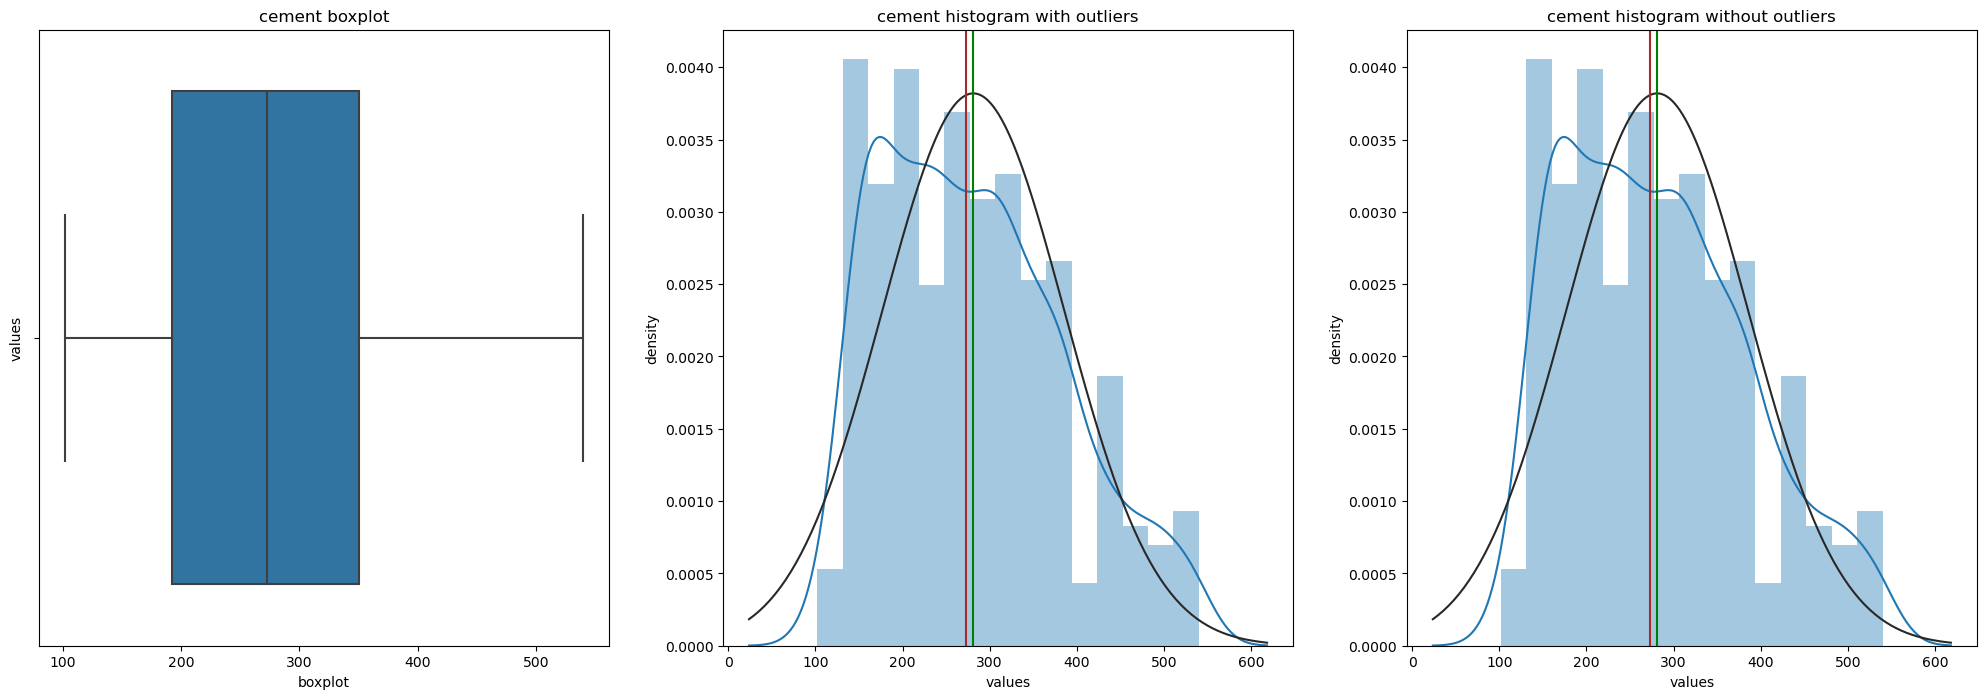


feature slag Have outliers
total no. of outliers in slag are 2
outlier% in slag is 0.001941747572815534


cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
918   239.6  359.4  0.0  185.7           0.0      941.6    664.3   28   
990   239.6  359.4  0.0  185.7           0.0      941.6    664.3    7   

     strength  
918     39.44  
990     25.42

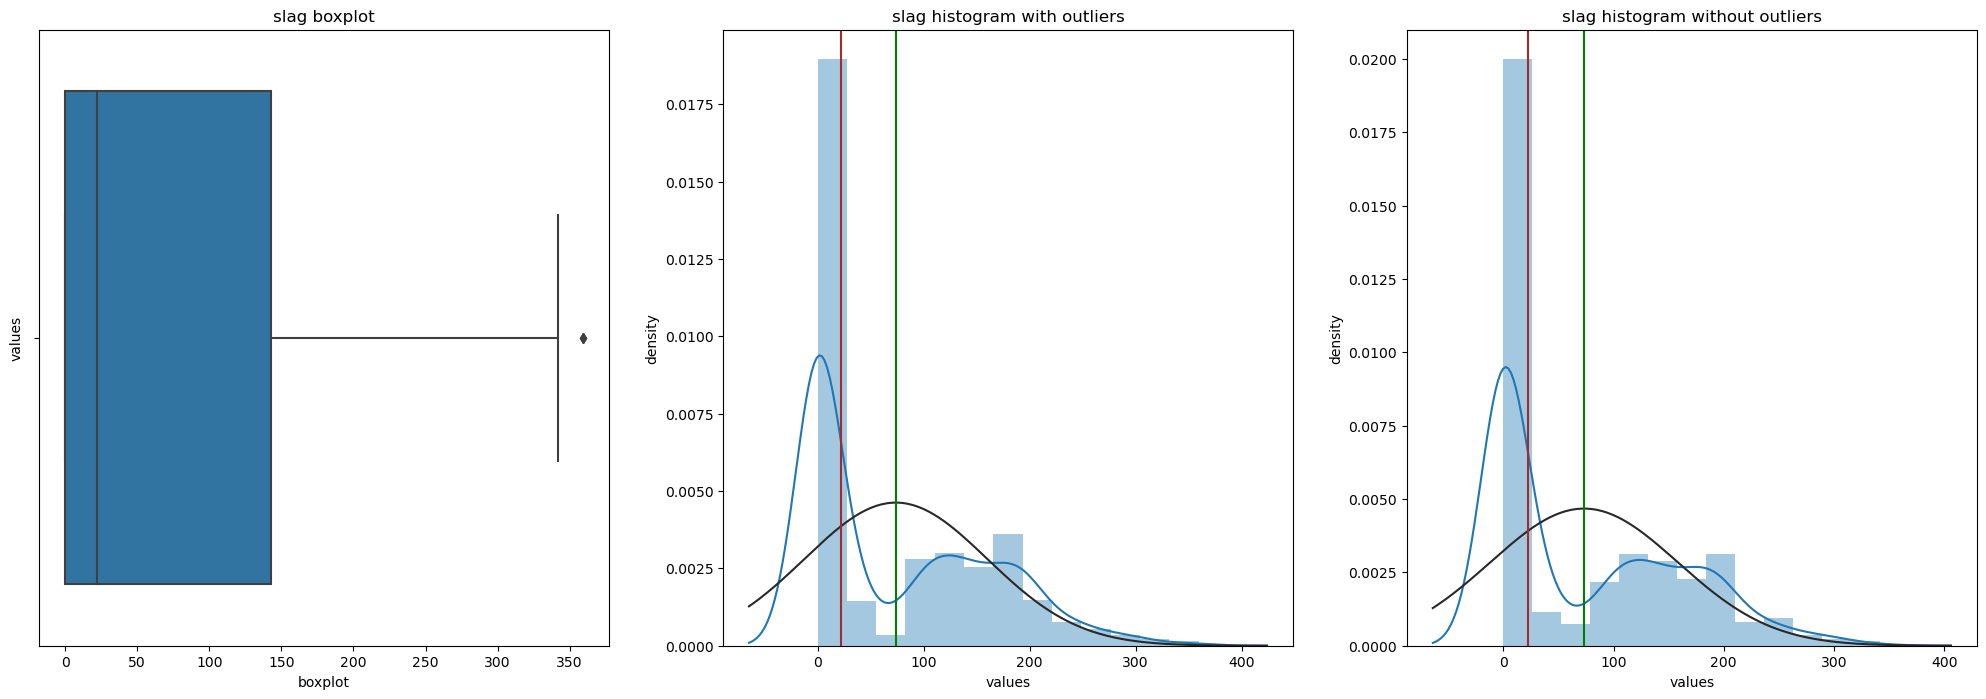

feature ash does not have any outliers


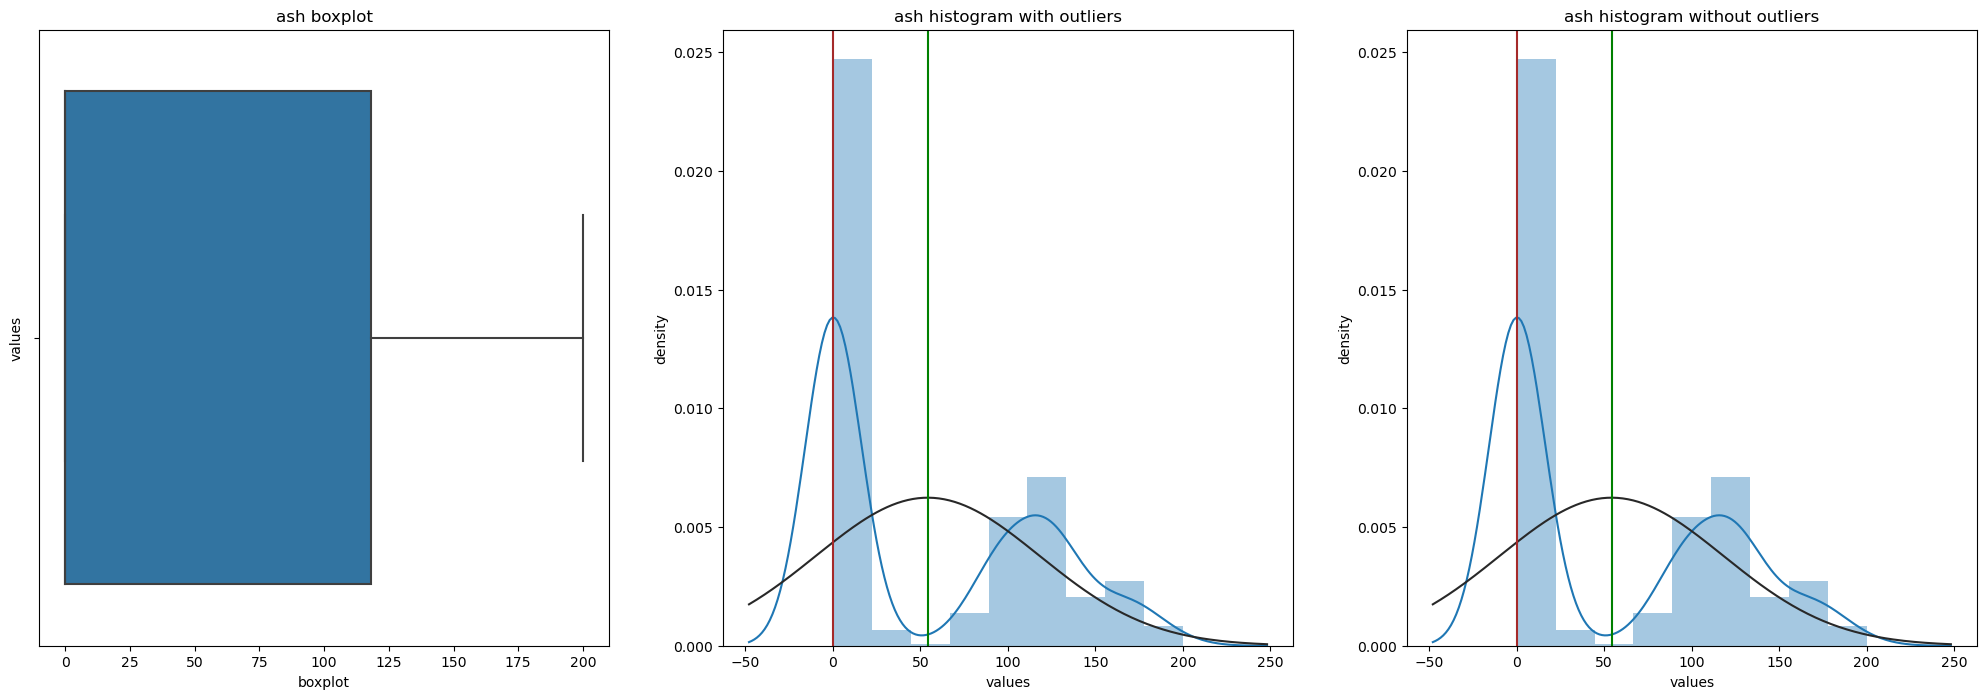


feature water Have outliers
total no. of outliers in water are 9
outlier% in water is 0.008737864077669903


cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
66    237.0   92.0   71.0  247.0           6.0      853.0    695.0   28   
263   236.9   91.7   71.5  246.9           6.0      852.9    695.4   28   
432   168.0   42.1  163.8  121.8           5.7     1058.7    780.1   28   
462   168.0   42.1  163.8  121.8           5.7     1058.7    780.1  100   
587   168.0   42.1  163.8  121.8           5.7     1058.7    780.1    3   
740   140.0  164.0  128.0  237.0           6.0      869.0    656.0   28   
789   168.0   42.1  163.8  121.8           5.7     1058.7    780.1   56   
826   139.7  163.9  127.7  236.7           5.8      868.6    655.6   28   
914   168.0   42.1  163.8  121.8           5.7     1058.7    780.1   14   

     strength  
66      28.63  
263     28.63  
432     24.24  
462     39.23  
587      7.75  
740     35.23  
789     32.85  
826     35.23  
914     17.82

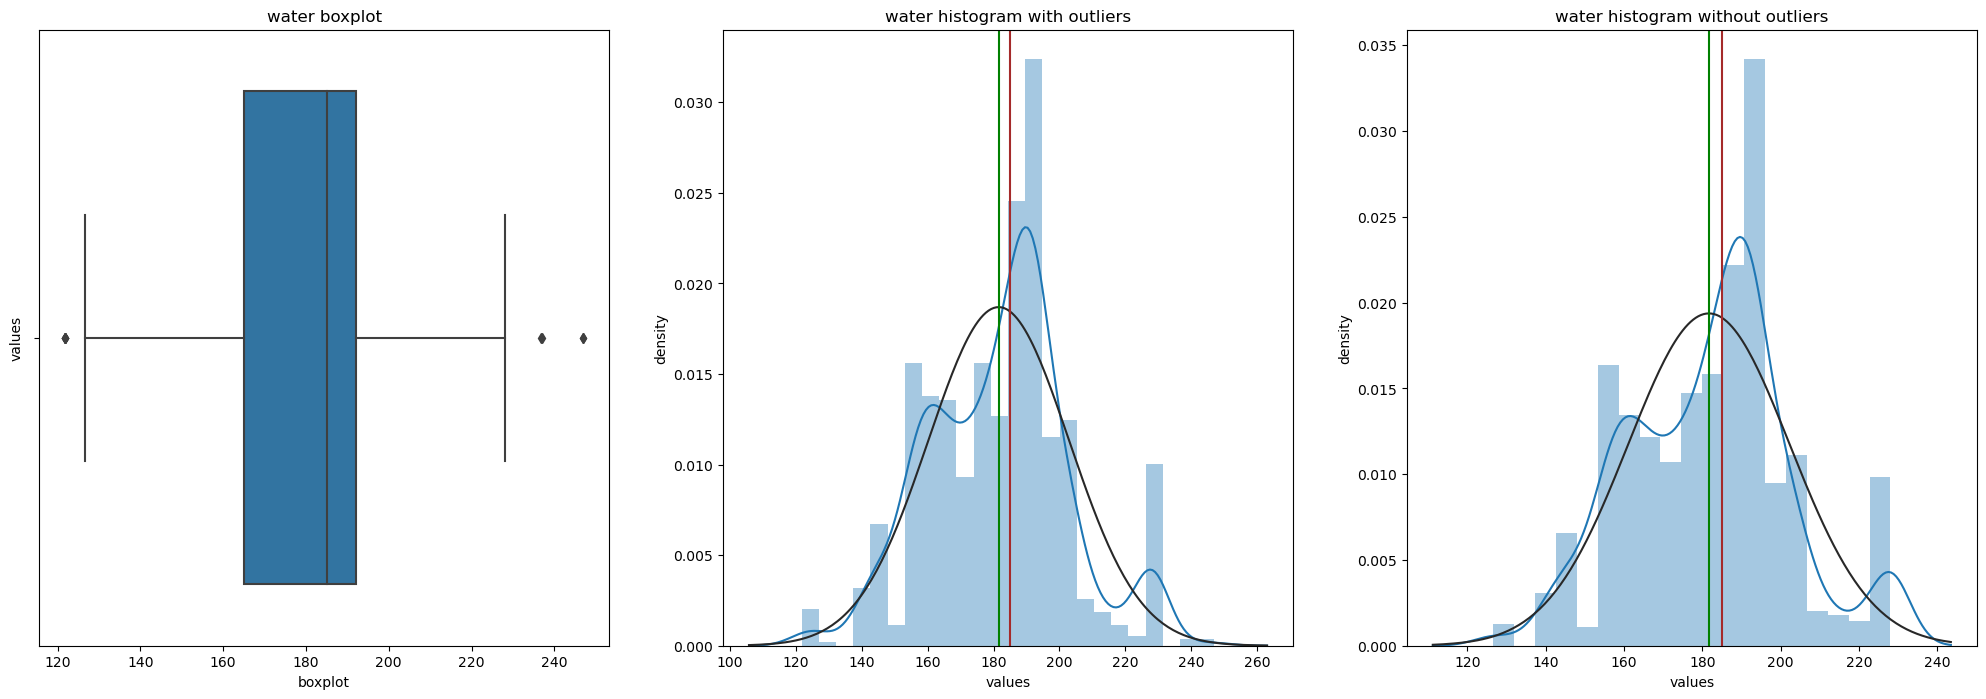


feature superplastic Have outliers
total no. of outliers in superplastic are 10
outlier% in superplastic is 0.009708737864077669


cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
44     531.3    0.0  0.0  141.8          28.2      852.1    893.7   91   
156    531.3    0.0  0.0  141.8          28.2      852.1    893.7   28   
232    469.0  117.2  0.0  137.8          32.2      852.1    840.5   56   
292    469.0  117.2  0.0  137.8          32.2      852.1    840.5   91   
538    531.3    0.0  0.0  141.8          28.2      852.1    893.7    7   
744    469.0  117.2  0.0  137.8          32.2      852.1    840.5    7   
816    469.0  117.2  0.0  137.8          32.2      852.1    840.5   28   
838    531.3    0.0  0.0  141.8          28.2      852.1    893.7   56   
955    469.0  117.2  0.0  137.8          32.2      852.1    840.5    3   
1026   531.3    0.0  0.0  141.8          28.2      852.1    893.7    3   

      strength  
44        59.2  
156       56.4  
232       69.3  
292       70.7  
538       46.9  
744       54.9  
816       66.9  
838       58.8  
955       40.2  
1026      41.3

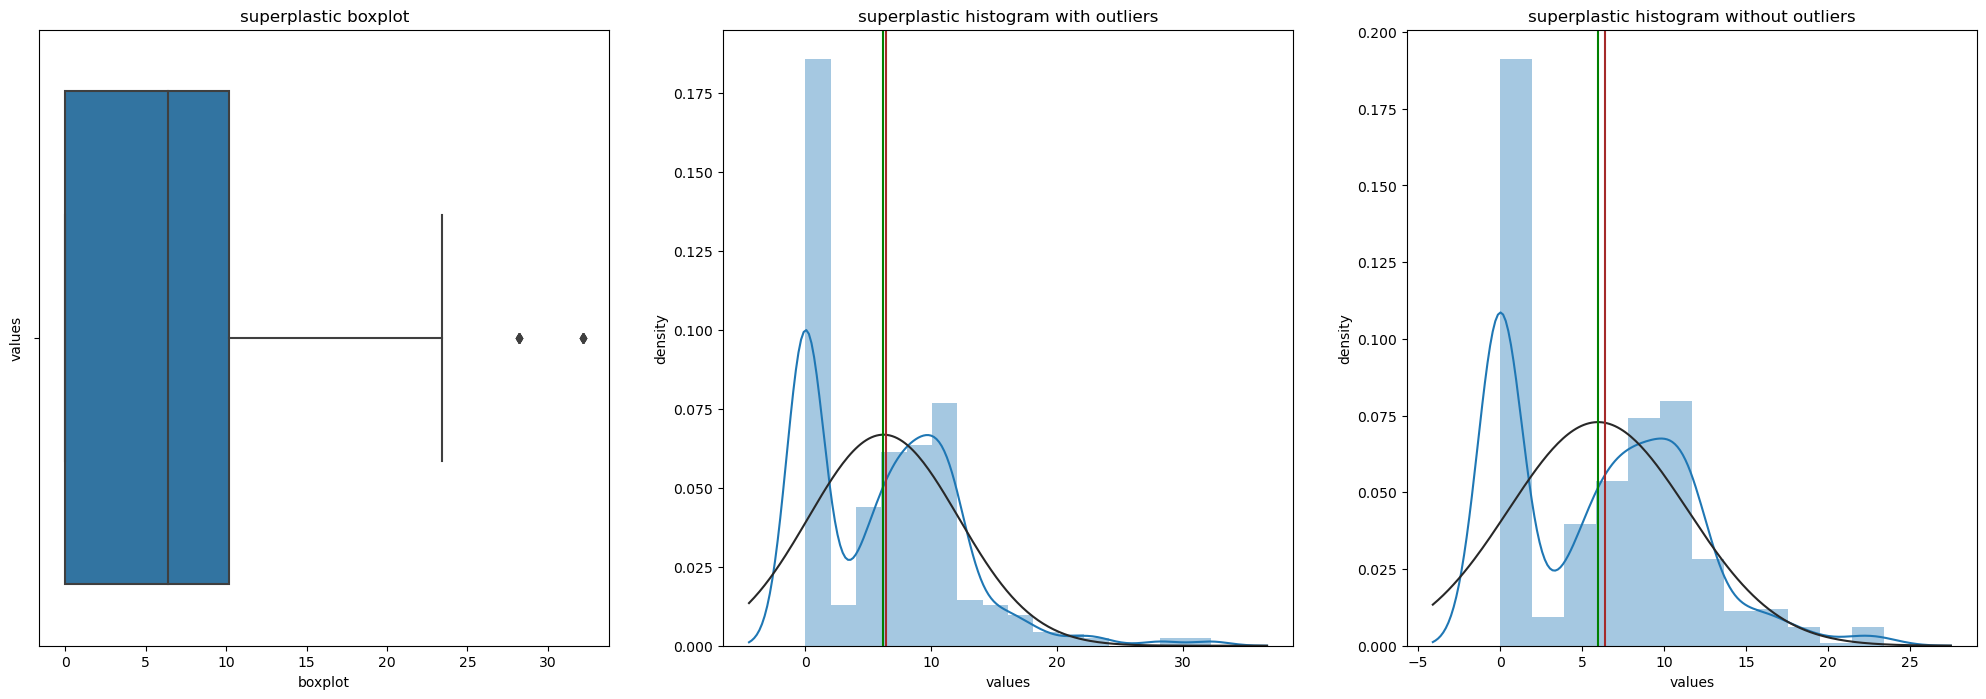

feature coarseagg does not have any outliers


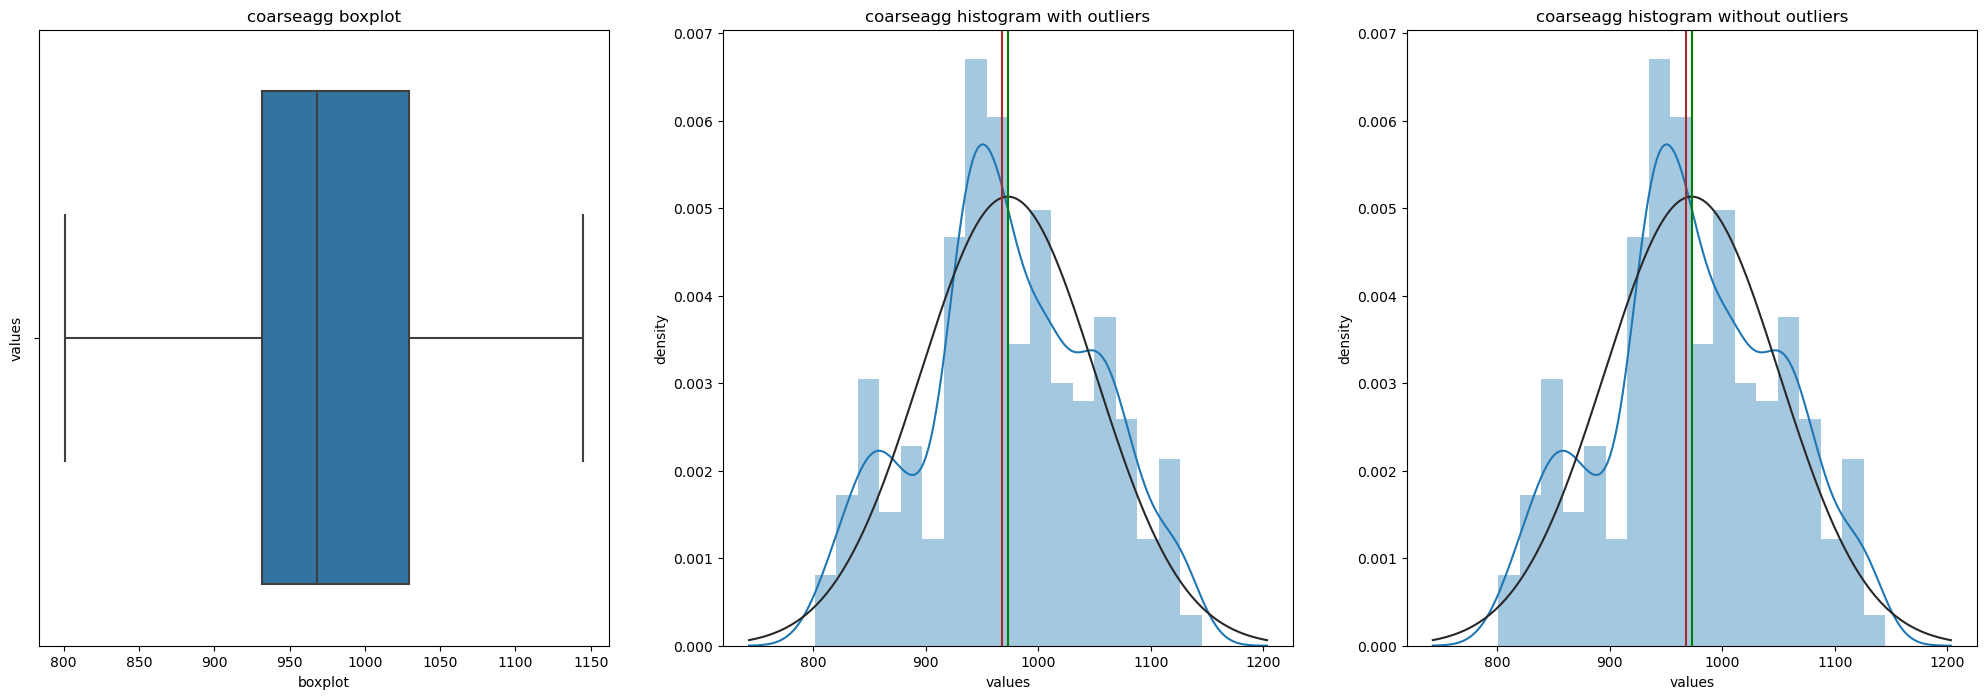


feature fineagg Have outliers
total no. of outliers in fineagg are 5
outlier% in fineagg is 0.0048543689320388345


cement  slag  ash  water  superplastic  coarseagg  fineagg  age  strength
129   375.0  93.8  0.0  126.6          23.4      852.1    992.6   91      62.5
447   375.0  93.8  0.0  126.6          23.4      852.1    992.6    7      45.7
504   375.0  93.8  0.0  126.6          23.4      852.1    992.6    3      29.0
584   375.0  93.8  0.0  126.6          23.4      852.1    992.6   56      60.2
857   375.0  93.8  0.0  126.6          23.4      852.1    992.6   28      56.7

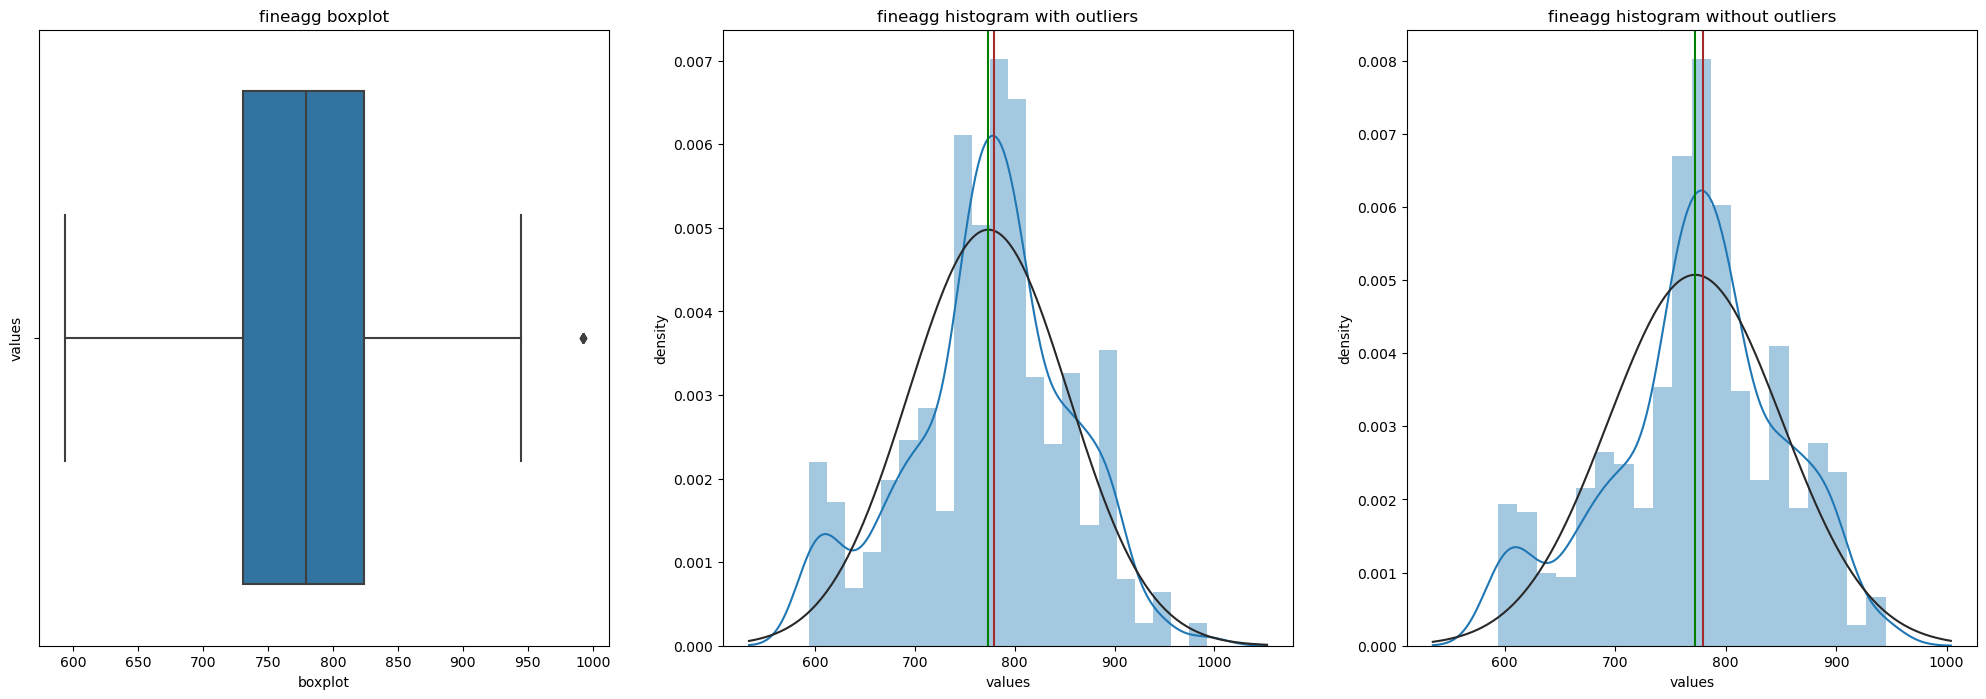


feature age Have outliers
total no. of outliers in age are 59
outlier% in age is 0.05728155339805825


cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
51     331.0    0.0  0.0  192.0           0.0      978.0    825.0  180   
64     332.5  142.5  0.0  228.0           0.0      932.0    594.0  365   
93     427.5   47.5  0.0  228.0           0.0      932.0    594.0  180   
99     237.5  237.5  0.0  228.0           0.0      932.0    594.0  180   
103    380.0    0.0  0.0  228.0           0.0      932.0    670.0  180   
133    236.0    0.0  0.0  193.0           0.0      968.0    885.0  365   
144    302.0    0.0  0.0  203.0           0.0      974.0    817.0  180   
149    380.0   95.0  0.0  228.0           0.0      932.0    594.0  270   
152    322.0    0.0  0.0  203.0           0.0      974.0    800.0  180   
157    198.6  132.4  0.0  192.0           0.0      978.4    825.5  360   
159    304.0   76.0  0.0  228.0           0.0      932.0    670.0  365   
198    266.0  114.0  0.0  228.0           0.0      932.0    670.0  365   
199    277.0    0.0  0.0  191.0           0.0      968.0    856.0  180   
207    190.0  190.0  0.0  228.0           0.0      932.0    670.0  180   
256    525.0    0.0  0.0  189.0           0.0     1125.0    613.0  270   
262    266.0  114.0  0.0  228.0           0.0      932.0    670.0  270   
270    500.0    0.0  0.0  200.0           0.0     1125.0    613.0  270   
297    475.0    0.0  0.0  228.0           0.0      932.0    594.0  270   
302    342.0   38.0  0.0  228.0           0.0      932.0    670.0  180   
312    236.0    0.0  0.0  193.0           0.0      968.0    885.0  180   
313    540.0    0.0  0.0  173.0           0.0     1125.0    613.0  270   
323    139.6  209.4  0.0  192.0           0.0     1047.0    806.9  360   
359    475.0    0.0  0.0  228.0           0.0      932.0    594.0  180   
361    277.0    0.0  0.0  191.0           0.0      968.0    856.0  360   
370    266.0  114.0  0.0  228.0           0.0      932.0    670.0  180   
393    342.0   38.0  0.0  228.0           0.0      932.0    670.0  365   
448    331.0    0.0  0.0  192.0           0.0      978.0    825.0  360   
465    427.5   47.5  0.0  228.0           0.0      932.0    594.0  365   
484    237.5  237.5  0.0  228.0           0.0      932.0    594.0  365   
539    304.0   76.0  0.0  228.0           0.0      932.0    670.0  180   
570    190.0  190.0  0.0  228.0           0.0      932.0    670.0  270   
581    525.0    0.0  0.0  189.0           0.0     1125.0    613.0  180   
594    339.0    0.0  0.0  197.0           0.0      968.0    781.0  180   
601    339.0    0.0  0.0  197.0           0.0      968.0    781.0  365   
620    332.5  142.5  0.0  228.0           0.0      932.0    594.0  180   
622    380.0   95.0  0.0  228.0           0.0      932.0    594.0  180   
623    380.0    0.0  0.0  228.0           0.0      932.0    670.0  270   
632    304.0   76.0  0.0  228.0           0.0      932.0    670.0  270   
642    198.6  132.4  0.0  192.0           0.0      978.4    825.5  180   
696    307.0    0.0  0.0  193.0           0.0      968.0    812.0  180   
713    190.0  190.0  0.0  228.0           0.0      932.0    670.0  365   
720    380.0   95.0  0.0  228.0           0.0      932.0    594.0  365   
721    500.0    0.0  0.0  200.0           0.0     1125.0    613.0  180   
754    254.0    0.0  0.0  198.0           0.0      968.0    863.0  365   
755    349.0    0.0  0.0  192.0           0.0     1047.0    806.0  360   
776    540.0    0.0  0.0  173.0           0.0     1125.0    613.0  180   
850    427.5   47.5  0.0  228.0           0.0      932.0    594.0  270   
861    310.0    0.0  0.0  192.0           0.0      970.0    850.0  180   
878    237.5  237.5  0.0  228.0           0.0      932.0    594.0  270   
900    254.0    0.0  0.0  198.0           0.0      968.0    863.0  180   
901    475.0    0.0  0.0  228.0           0.0      932.0    594.0  365   
919    310.0    0.0  0.0  192.0           0.0      970.0    850.0  360   
951    332.5  142.5  0.0  228.0           0.0      932.0    594.0  270   
957    307

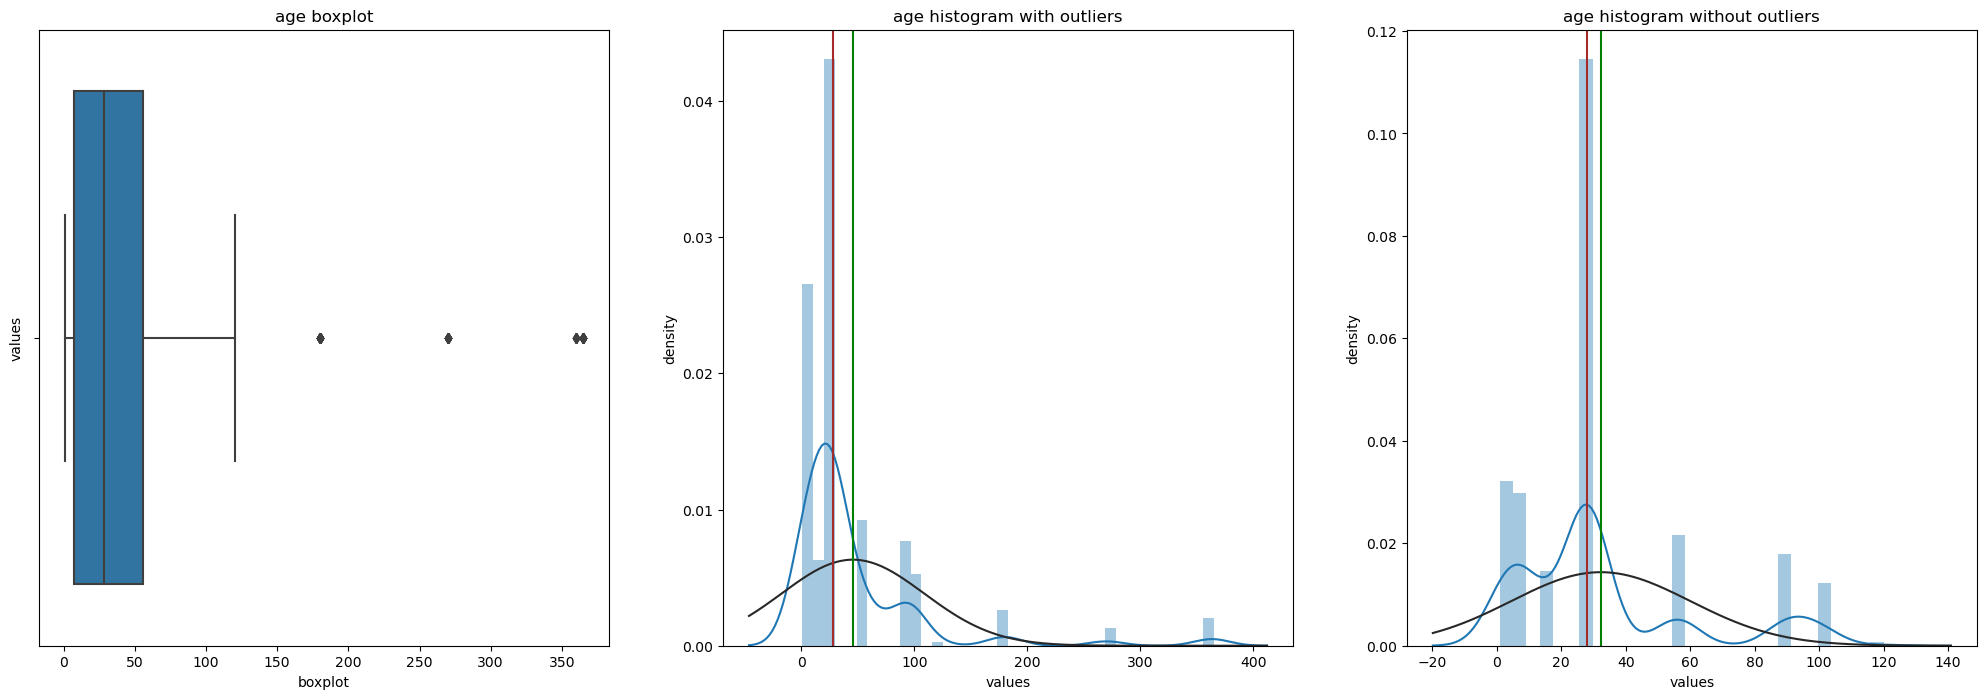


feature strength Have outliers
total no. of outliers in strength are 4
outlier% in strength is 0.003883495145631068


cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
192    315.0  137.0  0.0  145.0           5.9     1130.0    745.0   28   
732    540.0    0.0  0.0  162.0           2.5     1040.0    676.0   28   
950    389.9  189.0  0.0  145.9          22.0      944.7    755.8   91   
1003   323.7  282.8  0.0  183.8          10.3      942.7    659.9   56   

      strength  
192      81.75  
732      79.99  
950      82.60  
1003     80.20

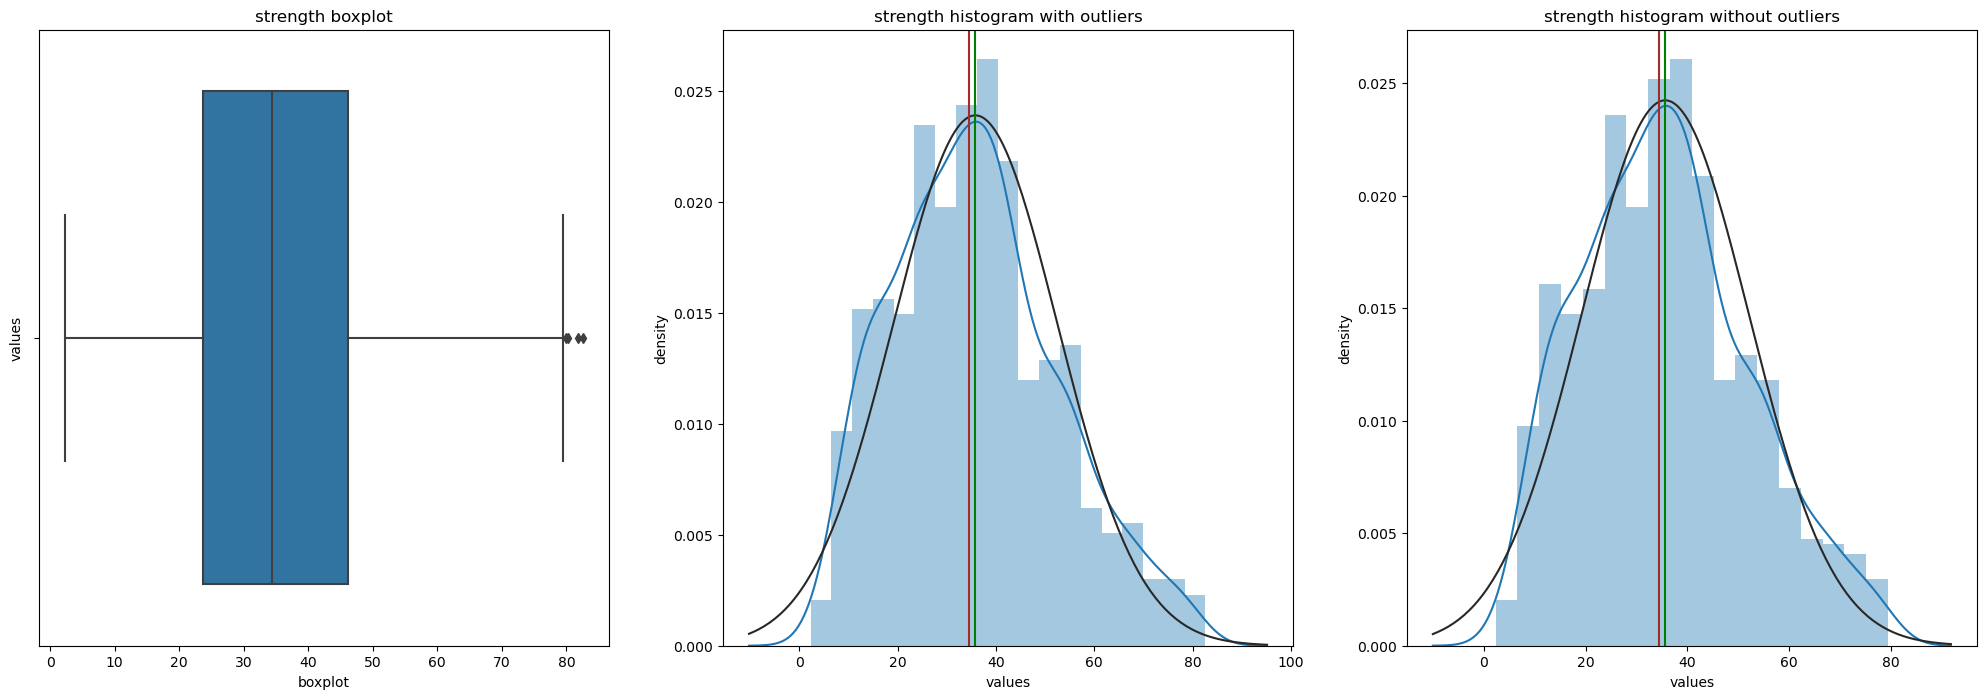

In [10]:
for col in df.columns:
    odt_plot(df,col)

### Multivariate analysis using regression

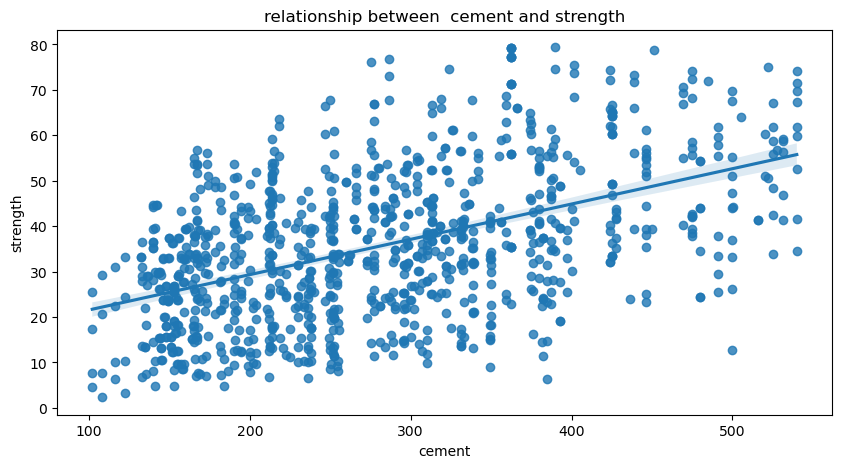

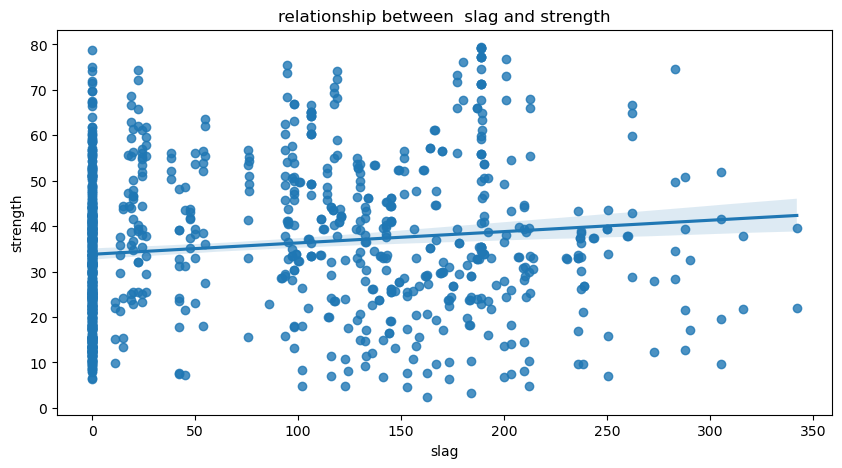

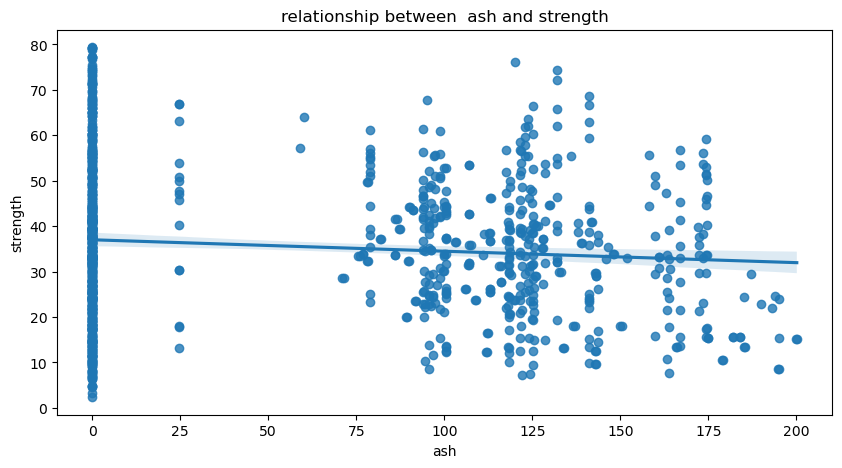

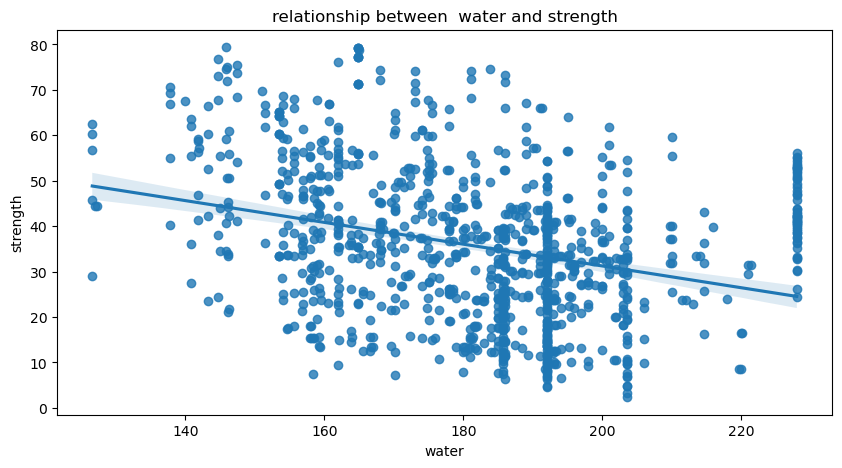

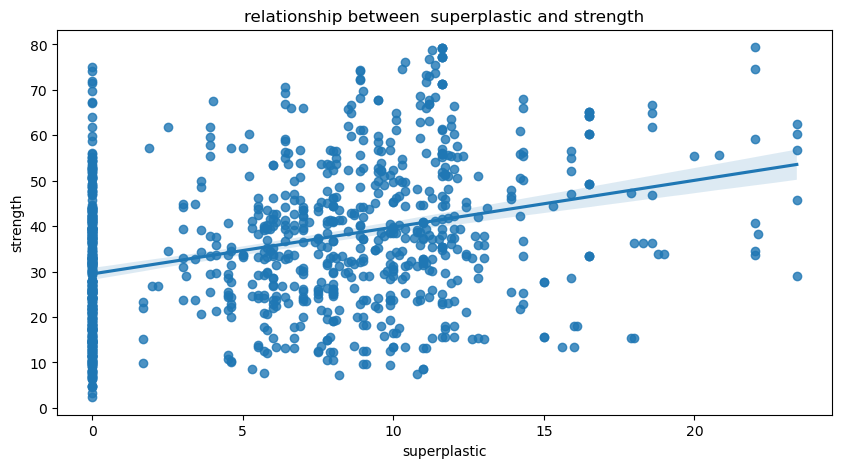

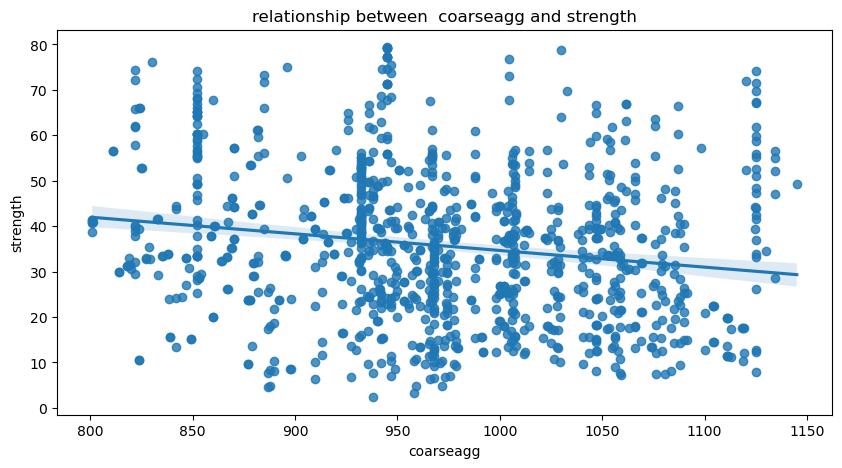

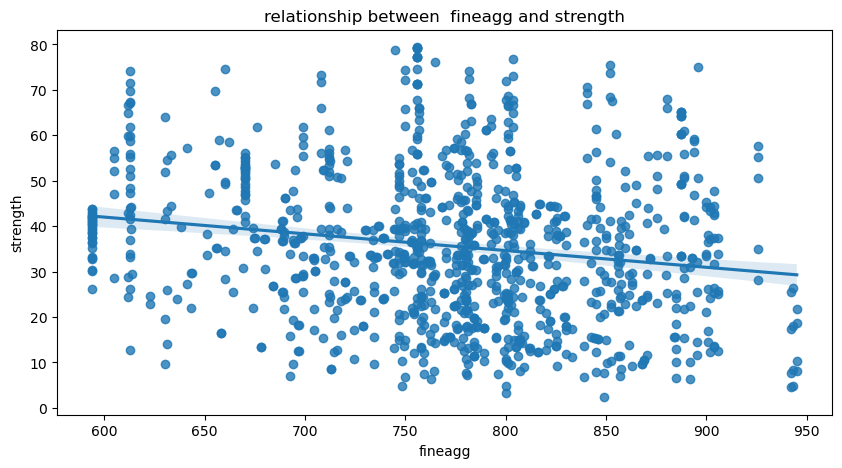

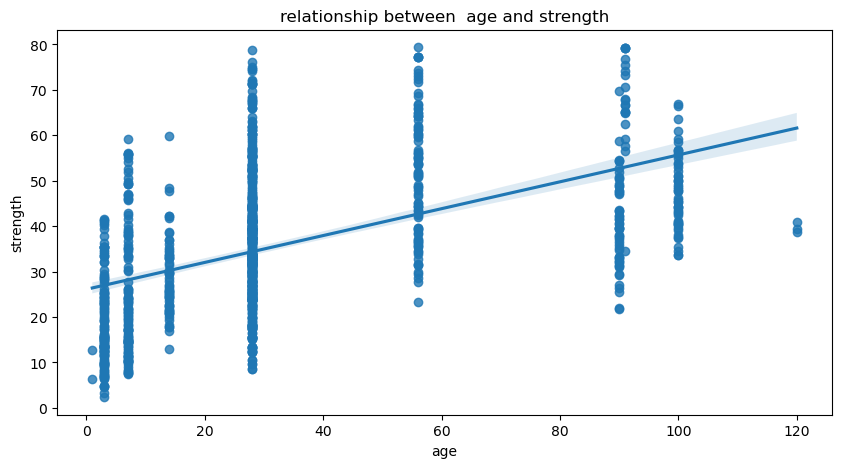

In [11]:
for col in df.columns:
    if col != 'strength':
        fig,ax1 = plt.subplots(figsize = (10,5))
        sns.regplot(x = df[col], y = df['strength'], ax=ax1).set_title(f'relationship between  {col} and strength')

Analysis:

1. Cement and strength are highly positively corelated
2. Slag and strength are slightly positively corelated
3. Ash and strength are slightly negatively corelated
4. Water and strength are highly negatively corelated
5. Superplastic and strength are highly positively corelated
6. coarsegg and strength are slightly negatively corelated
7. fineagg and strength are slightly neagtively corelated
8. Age and strength are slightly positively corelated

### Multicollinearity test

#### Stage 1 test - correlation heat map/matrix

<AxesSubplot:>

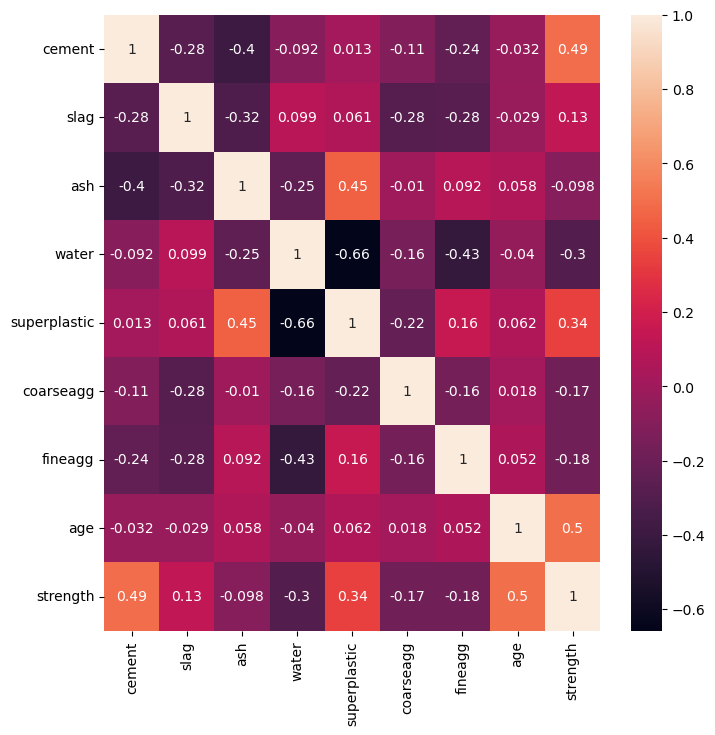

In [12]:
corr = df.corr()
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True)

Ash and Superplastic are highly corelated with 45%



Inversely Propotional:

Superplastic and Water are highly corelated with 66%

Fineagg and Water are highly corelated with 43%

Slag and Ash are highly corelated with 32%

Ash and Cement are highly corelated with 40%

Many independent features have colinearity more than 30%  so we can conclude that multicolinearity exists as stage1 result 

### Multicolinearity test 2

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

#### Stage 2 test - VIF
VIF --> Variance inflating factor

Formula for VIF = 1(1-r2score)
  
  
steps for VIF

1. Regress every independent variable with each other and find the r2 score
2. Find out the VIF using the formula
3. if VIF is more than 5 for any variable we can conclude that multicolinearity exists

In [13]:
def VIF(features):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(features.values, i)for i in range(features.shape[1])]
    vif['Features'] = features.columns
    return vif.sort_values(by='VIF', ascending=False)

In [14]:
vif = VIF(df.drop('strength', axis=1))
vif

VIF      Features
5  86.938582     coarseagg
3  81.963087         water
6  68.664404       fineagg
0  14.291158        cement
4   5.724145  superplastic
2   4.415840           ash
1   3.342314          slag
7   2.368372           age

How to treat multicolinearity

1. Removing some highly corelated independet variables
2. Linearly combine the independent variables, like Adding them.
3. Use Princpal component analysis or Regularization



### PCA

In [15]:
def pca1(x):
    n_com = len(x.columns)
    x = StandardScaler().fit_transform(x)
    
    for i in range(1,n_com):
        pca = PCA(n_components=i)
        p_com = pca.fit_transform(x)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1] > 0.9 :
            n_components = i
            break
            
    print('Explained Variance ratio after PCA is:', evr)
    col = []
    for j in range(1,n_components+1):
        col.append('PC_'+str(j))
    pca_df = pd.DataFrame(p_com, columns=col)
    
    return pca_df

In [16]:
transformed_df = pca1(df.drop('strength', axis=1))
transformed_df.head()

Explained Variance ratio after PCA is: [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


PC_1      PC_2      PC_3      PC_4      PC_5      PC_6
0  1.810919  1.331664 -1.284484 -0.306148 -0.067652 -0.886110
1 -1.823833 -0.573436 -1.058973  0.893130 -0.913984 -0.751061
2 -0.739819 -0.463200 -0.541643 -1.033210 -0.308068  0.611045
3  2.766368  0.602978 -0.512532  0.008806  0.086415  0.850548
4  0.892523  0.966627 -0.863624  1.148561 -0.064439 -1.221228

- com --> components
- pca --> Variable
- cumsum --> cummulivative sum

In [17]:
transformed_df = transformed_df.join(df['strength'], how='left')
transformed_df.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6  strength
0  1.810919  1.331664 -1.284484 -0.306148 -0.067652 -0.886110     29.89
1 -1.823833 -0.573436 -1.058973  0.893130 -0.913984 -0.751061     23.51
2 -0.739819 -0.463200 -0.541643 -1.033210 -0.308068  0.611045     29.22
3  2.766368  0.602978 -0.512532  0.008806  0.086415  0.850548     45.85
4  0.892523  0.966627 -0.863624  1.148561 -0.064439 -1.221228     18.29

### Model Building

1. train Test split
2. cross validation 
3. hyperparameter tuning

In [18]:
def trainAndtestsplit(data, t_col, test_size=0.3):
    X = data.drop(t_col, axis=1)
    Y = data[t_col]
    return train_test_split(X, Y, test_size=test_size, random_state=42)

In [19]:
def build_model(model_name, estimator, data, t_col):
    X_train, X_test, Y_train, Y_test = trainAndtestsplit(data,t_col)
    estimator.fit(X_train, Y_train)
    Y_pred = estimator.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    r2score = r2_score(Y_test, Y_pred)
    
    return [model_name, rmse, r2score]

In [20]:
build_model(model_name='Linear Regression', estimator=LinearRegression(),
           data=transformed_df, t_col='strength')

['Linear Regression', 9.574377990891842, 0.6268240358306478]

In [21]:
def multiple_models(data, t_col):
    col_names =['Model name', 'RMSE', 'R2 Score']
    result = pd.DataFrame(columns=col_names)
    result.loc[len(result)] = build_model('Linear Regression', LinearRegression(), data, t_col)
    result.loc[len(result)] = build_model('Lasso', Lasso(), data, t_col)
    result.loc[len(result)] = build_model('Ridge', Ridge(), data, t_col)
    result.loc[len(result)] = build_model('DT Regression', DecisionTreeRegressor(), data, t_col)
    result.loc[len(result)] = build_model('KN Regression', KNeighborsRegressor(), data, t_col)
    result.loc[len(result)] = build_model('SV Regression', SVR(), data, t_col)
    result.loc[len(result)] = build_model('RF Regression', RandomForestRegressor(), data, t_col)
    result.loc[len(result)] = build_model('ADB Regression', AdaBoostRegressor(), data, t_col)
    result.loc[len(result)] = build_model('GB Regression', GradientBoostingRegressor(), data, t_col)
    result.loc[len(result)] = build_model('XGB Regression', XGBRegressor(), data, t_col)
    
    return result.sort_values(['R2 Score'], ascending=False)

In [22]:
multiple_models(transformed_df, 'strength')

Model name      RMSE  R2 Score
9     XGB Regression  6.259367  0.840503
6      RF Regression  6.312756  0.837770
8      GB Regression  6.792864  0.812156
3      DT Regression  7.422378  0.775726
7     ADB Regression  8.031418  0.737411
4      KN Regression  8.053906  0.735938
5      SV Regression  8.685040  0.692931
1              Lasso  9.439787  0.637242
2              Ridge  9.571666  0.627035
0  Linear Regression  9.574378  0.626824

### Cross Validation

In [23]:
def k_fold_cv(X, Y, fold=10):
    score_lr = cross_val_score(LinearRegression(),
                              X, Y, cv=fold)
    score_ls = cross_val_score(Lasso(),
                              X, Y, cv=fold)
    score_rd = cross_val_score(Ridge(),
                              X, Y, cv=fold)
    score_rf = cross_val_score(RandomForestRegressor(),
                              X, Y, cv=fold)
    score_svr = cross_val_score(SVR(),
                              X, Y, cv=fold)
    score_knr = cross_val_score(KNeighborsRegressor(),
                              X, Y, cv=fold)
    score_dt = cross_val_score(DecisionTreeRegressor(),
                              X, Y, cv=fold)
    score_ada = cross_val_score(AdaBoostRegressor(),
                              X, Y, cv=fold)
    score_xgb = cross_val_score(XGBRegressor(),
                              X, Y, cv=fold)
    score_grb = cross_val_score(GradientBoostingRegressor(),
                              X, Y, cv=fold)
  
    model_names = ['Linear Reg.', 'Lasso', 'Ridge', 'Random Forest','svr', 'knr', 'Dt', 'Ada', 'xgb', 'gbr']
    scores = [score_lr, score_ls, score_rd, score_rf, score_svr, score_knr, score_dt, score_ada,
             score_xgb, score_grb]
    result = []
    for i in range(len(model_names)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_names[i]
        result.append([m_name, score_mean, score_std])
        
    k_fold_df = pd.DataFrame(result, columns=['Model Name', 'Avg.R2 Score', 'STD R2 Score'])
    return k_fold_df.sort_values(['Avg.R2 Score'], ascending=False)



In [24]:
k_fold_cv(transformed_df.drop('strength', axis=1),transformed_df['strength'])

Model Name  Avg.R2 Score  STD R2 Score
8            xgb      0.873262      0.036061
3  Random Forest      0.868292      0.032007
9            gbr      0.829206      0.050342
5            knr      0.768329      0.056015
6             Dt      0.758747      0.060285
7            Ada      0.730042      0.038029
4            svr      0.703117      0.042765
2          Ridge      0.663935      0.059437
0    Linear Reg.      0.663928      0.059476
1          Lasso      0.649837      0.049887

### Hyperparameter tuning

In [25]:
def tuning(X, Y, fold=10):
    param_xgboost = {'alpha': [0,1], 'gamma':[0,10,20,30,40,50], 'reg_lambda':[0,1]}
    param_gboost = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_rf = {'n_estimators':[50,100,150], 'max_features':['auto', 'log2']}
    
    tune_xgb = GridSearchCV(XGBRegressor(),param_xgboost, cv=fold)
    tune_gb = GridSearchCV(GradientBoostingRegressor(),param_gboost, cv=fold)
    tune_rf = GridSearchCV(RandomForestRegressor(),param_rf, cv=fold)
                           
    tune_xgb.fit(X, Y)
    tune_gb.fit(X, Y)
    tune_rf.fit(X, Y)
                           
    tuned = [tune_xgb, tune_gb, tune_rf]
    models = ['Xgboost', 'Gboost', 'Random Forest']
                        
    for i in range(len(tuned)):
        print('Model :', models[i])
        print('Best Params :', tuned[i].best_params_)



In [26]:
tuning(transformed_df.drop('strength', axis=1),transformed_df['strength'])

Model : Xgboost
Best Params : {'alpha': 1, 'gamma': 0, 'reg_lambda': 1}
Model : Gboost
Best Params : {'alpha': 0.4}
Model : Random Forest
Best Params : {'max_features': 'log2', 'n_estimators': 100}


In [27]:
def cv_hpt(X, Y, fold=10):
    score_lr = cross_val_score(LinearRegression(),
                              X, Y, cv=fold)
    score_ls = cross_val_score(Lasso(),
                              X, Y, cv=fold)
    score_rd = cross_val_score(Ridge(),
                              X, Y, cv=fold)
    score_rf = cross_val_score(RandomForestRegressor(max_features='auto', n_estimators=150),
                              X, Y, cv=fold)
    score_svr = cross_val_score(SVR(),
                              X, Y, cv=fold)
    score_knr = cross_val_score(KNeighborsRegressor(),
                              X, Y, cv=fold)
    score_dt = cross_val_score(DecisionTreeRegressor(),
                              X, Y, cv=fold)
    score_ada = cross_val_score(AdaBoostRegressor(),
                              X, Y, cv=fold)
    score_xgb = cross_val_score(XGBRegressor(alpha=1, gamma=0, reg_lambda=1),
                              X, Y, cv=fold)
    score_grb = cross_val_score(GradientBoostingRegressor(alpha=0.1),
                              X, Y, cv=fold)
  
    model_names = ['Linear Reg.', 'Lasso', 'Ridge', 'Random Forest','svr', 'knr', 'Dt', 'Ada', 'xgb', 'gbr']
    scores = [score_lr, score_ls, score_rd, score_rf, score_svr, score_knr, score_dt, score_ada,
              score_xgb, score_grb]
    result = []
    for i in range(len(model_names)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_names[i]
        result.append([m_name, score_mean, score_std])
        
    k_fold_df = pd.DataFrame(result, columns=['Model Name', 'Avg.R2 Score', 'STD R2 Score'])
    return k_fold_df.sort_values(['Avg.R2 Score'], ascending=False)



In [28]:
cv_hpt(transformed_df.drop('strength', axis=1),transformed_df['strength'])

Model Name  Avg.R2 Score  STD R2 Score
8            xgb      0.877997      0.031728
3  Random Forest      0.867683      0.032041
9            gbr      0.829054      0.050194
5            knr      0.768329      0.056015
6             Dt      0.765775      0.052109
7            Ada      0.729780      0.039693
4            svr      0.703117      0.042765
2          Ridge      0.663935      0.059437
0    Linear Reg.      0.663928      0.059476
1          Lasso      0.649837      0.049887

### Clustering

As Unsupervised ML lin
Create a new feature, using it fot supe, used to map 

<AxesSubplot:xlabel='cement', ylabel='strength'>

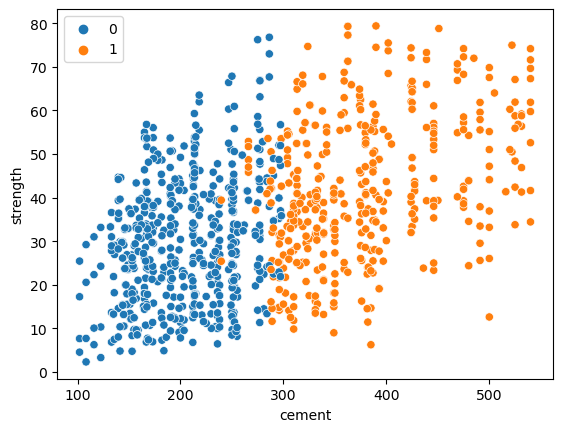

In [29]:
labels = KMeans(n_clusters=2, random_state=42)
cluster = labels.fit_predict(df.drop('strength', axis=1))
sns.scatterplot(x=df['cement'], y=df['strength'], hue=cluster)

In [30]:
def clustering(x, tcol, cluster):
    column = list(set(list(x.columns)) -set(['strength']))
    r = int(len(column)/2)
    if len(column)%2 == 0:
        r = r
    else:
        r += 1
    f,ax=plt.subplots(r,2,figsize=(15,15))
    a = 0
    for row in range(r):
        for col in range(0,2):
            if a != len(column):
                ax[row][col].scatter(x[tcol], x[column[a]], c = cluster)
                ax[row][col].set_xlabel(tcol)
                ax[row][col].set_ylabel(column[a])
                a += 1

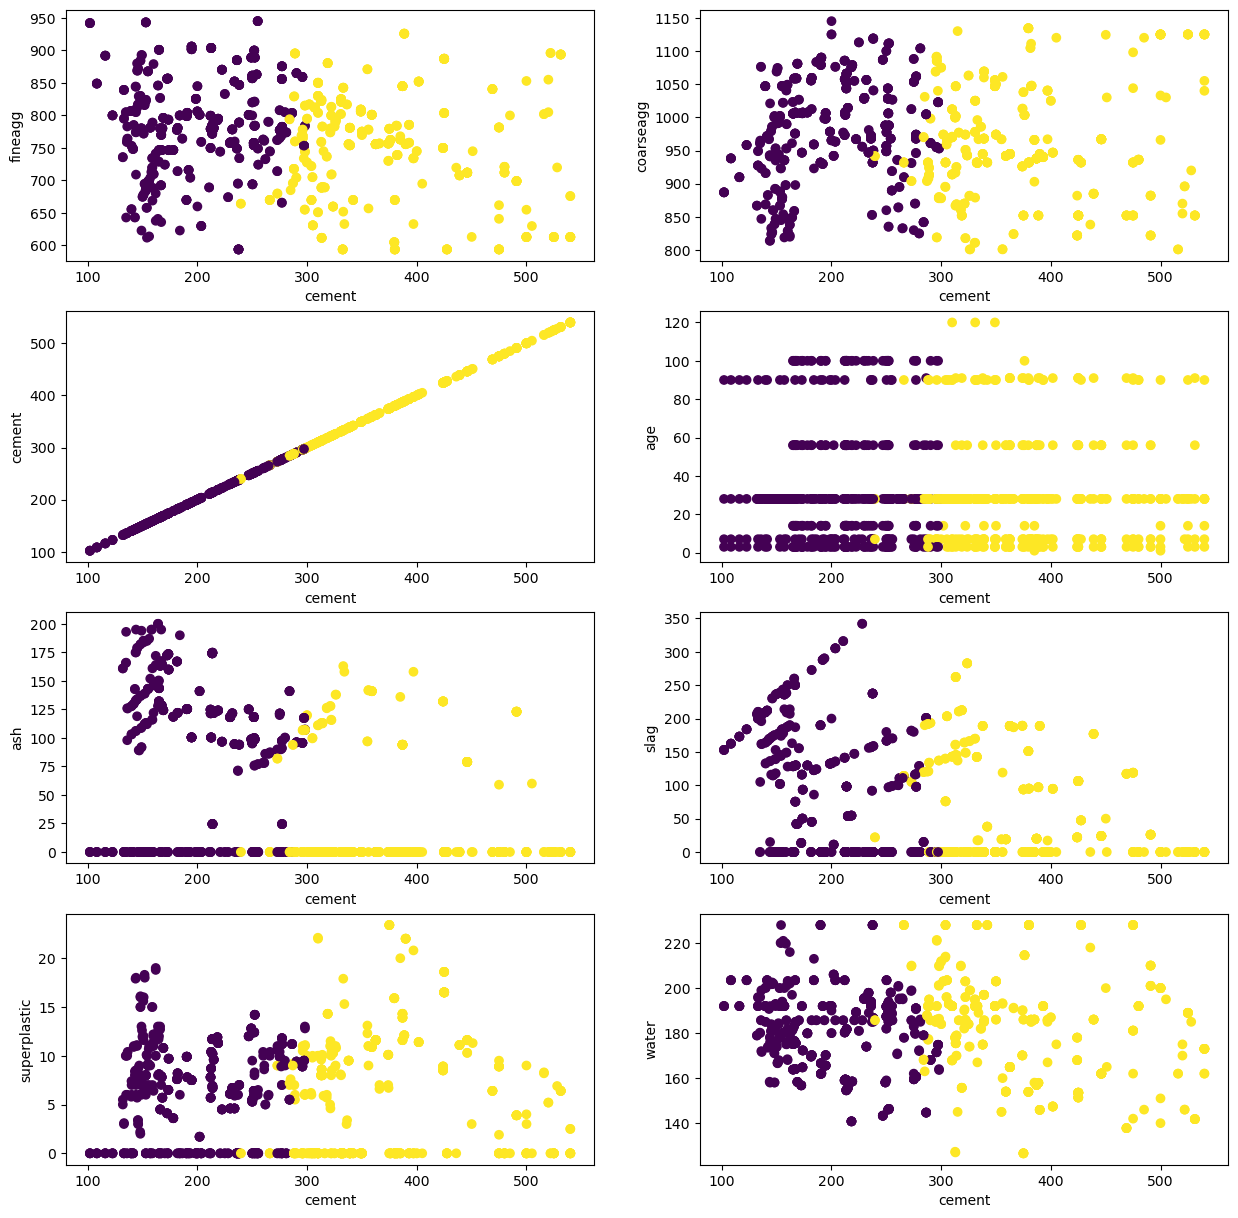

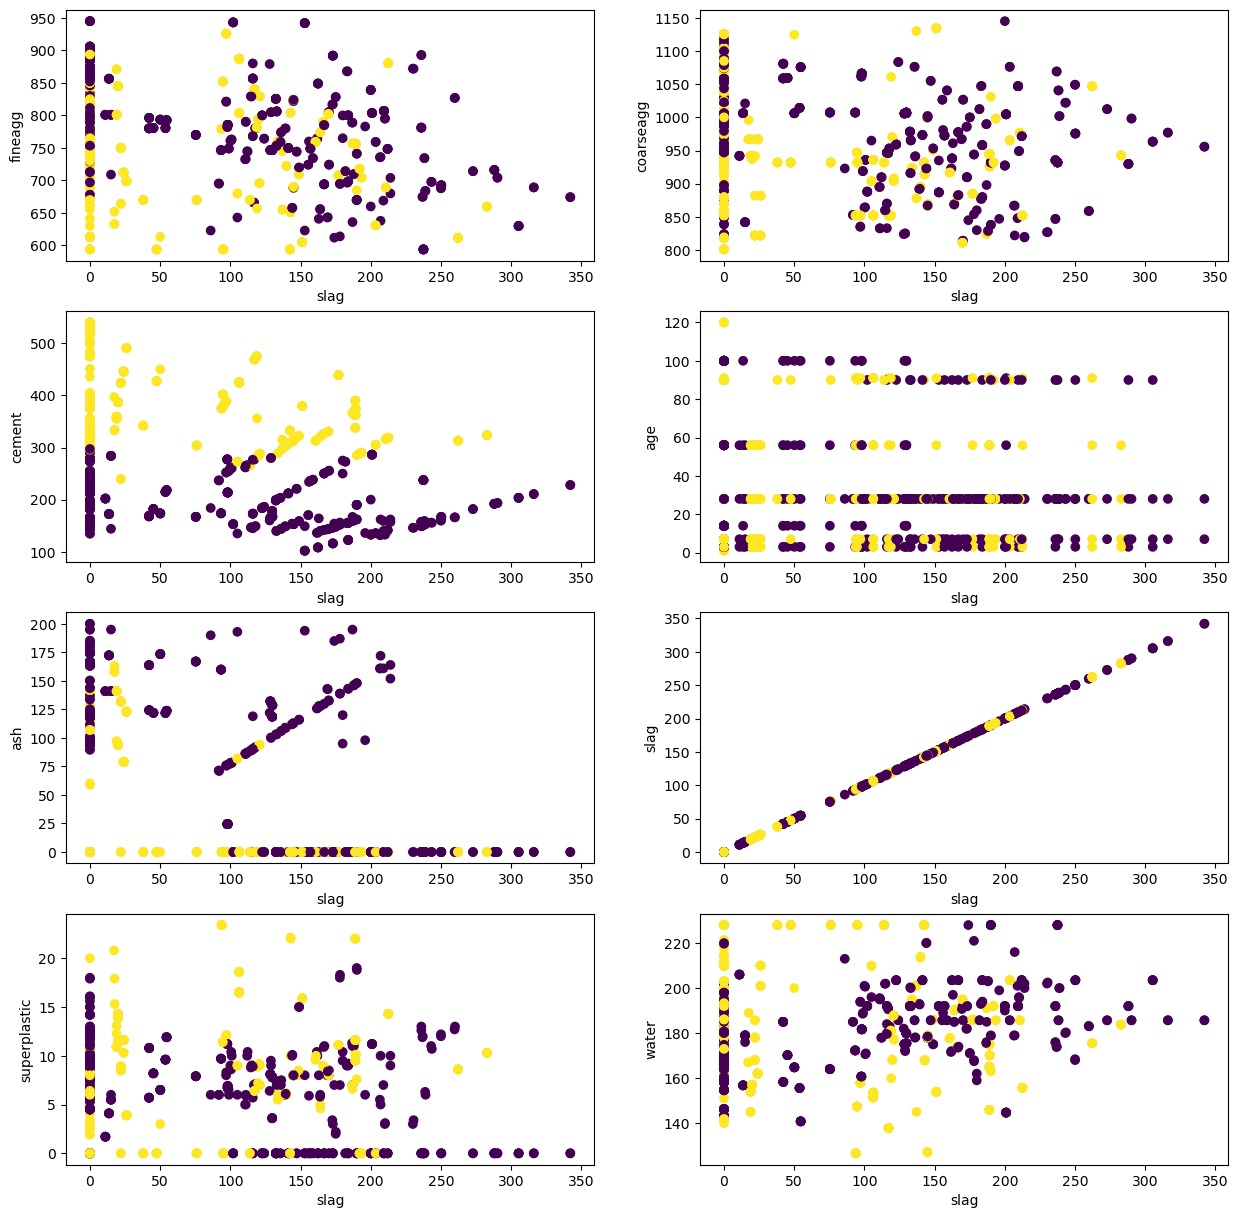

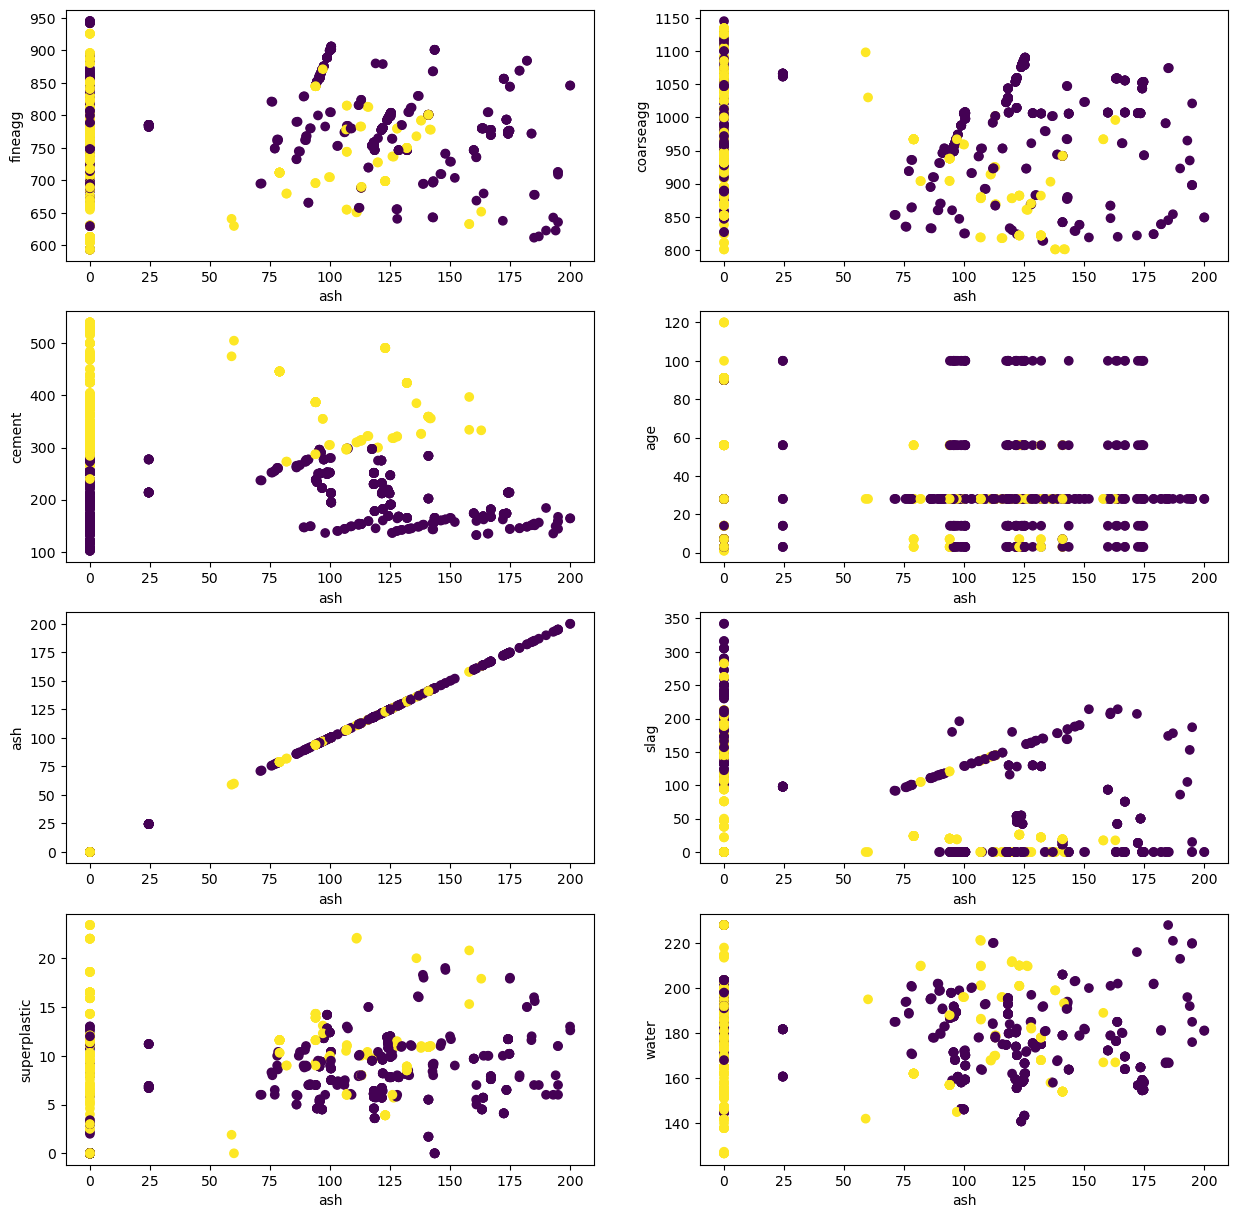

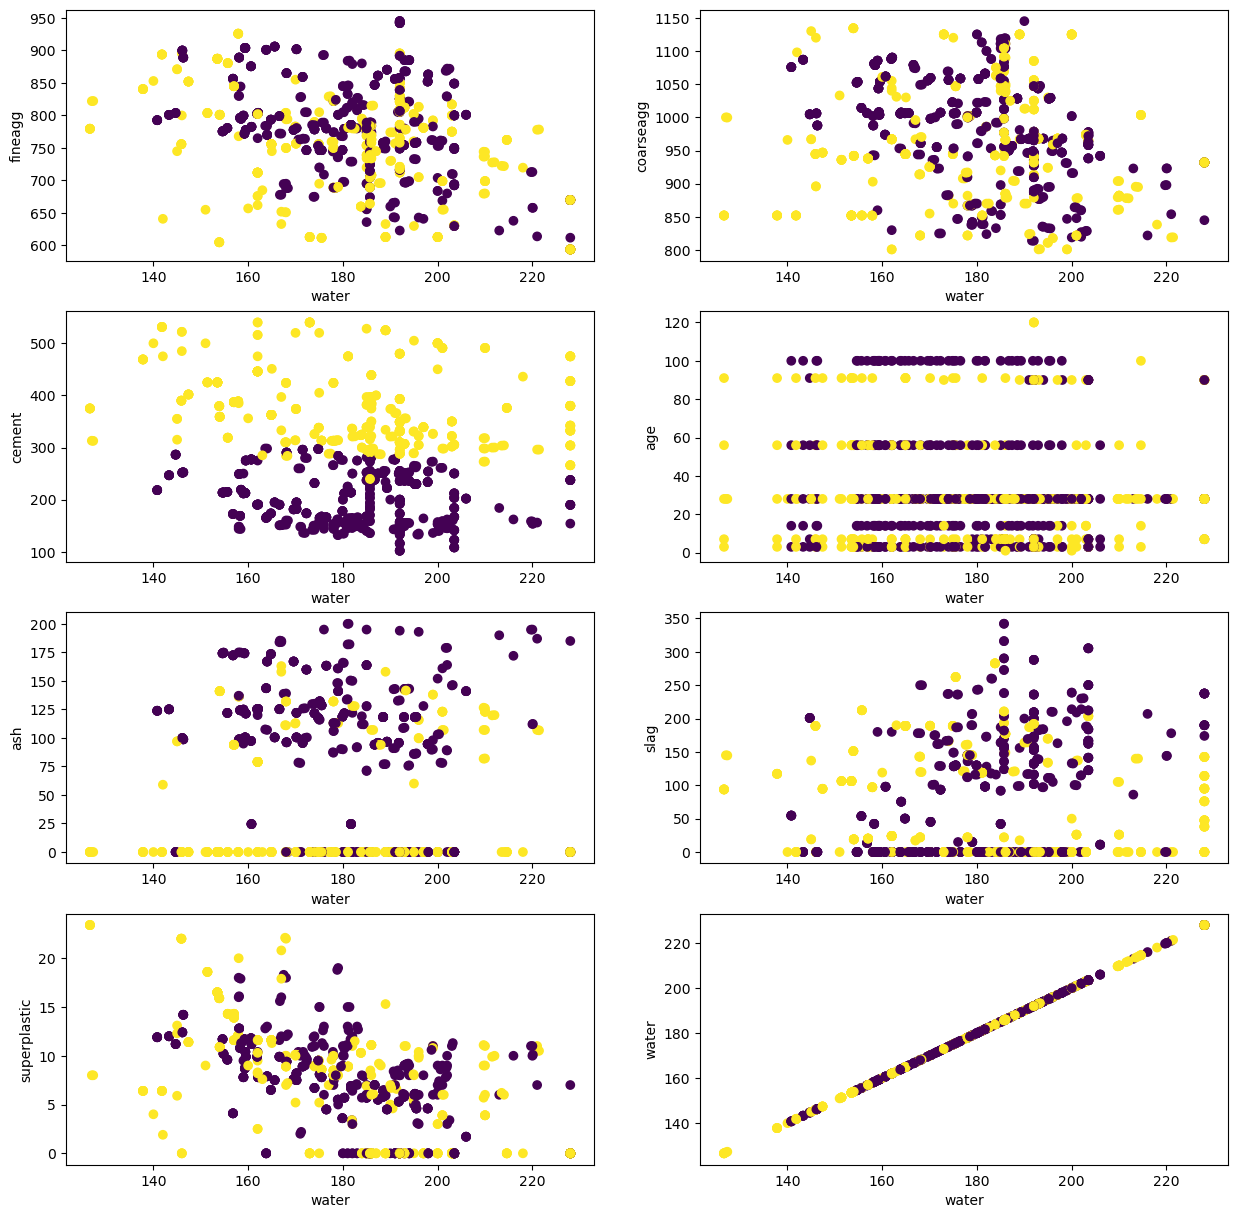

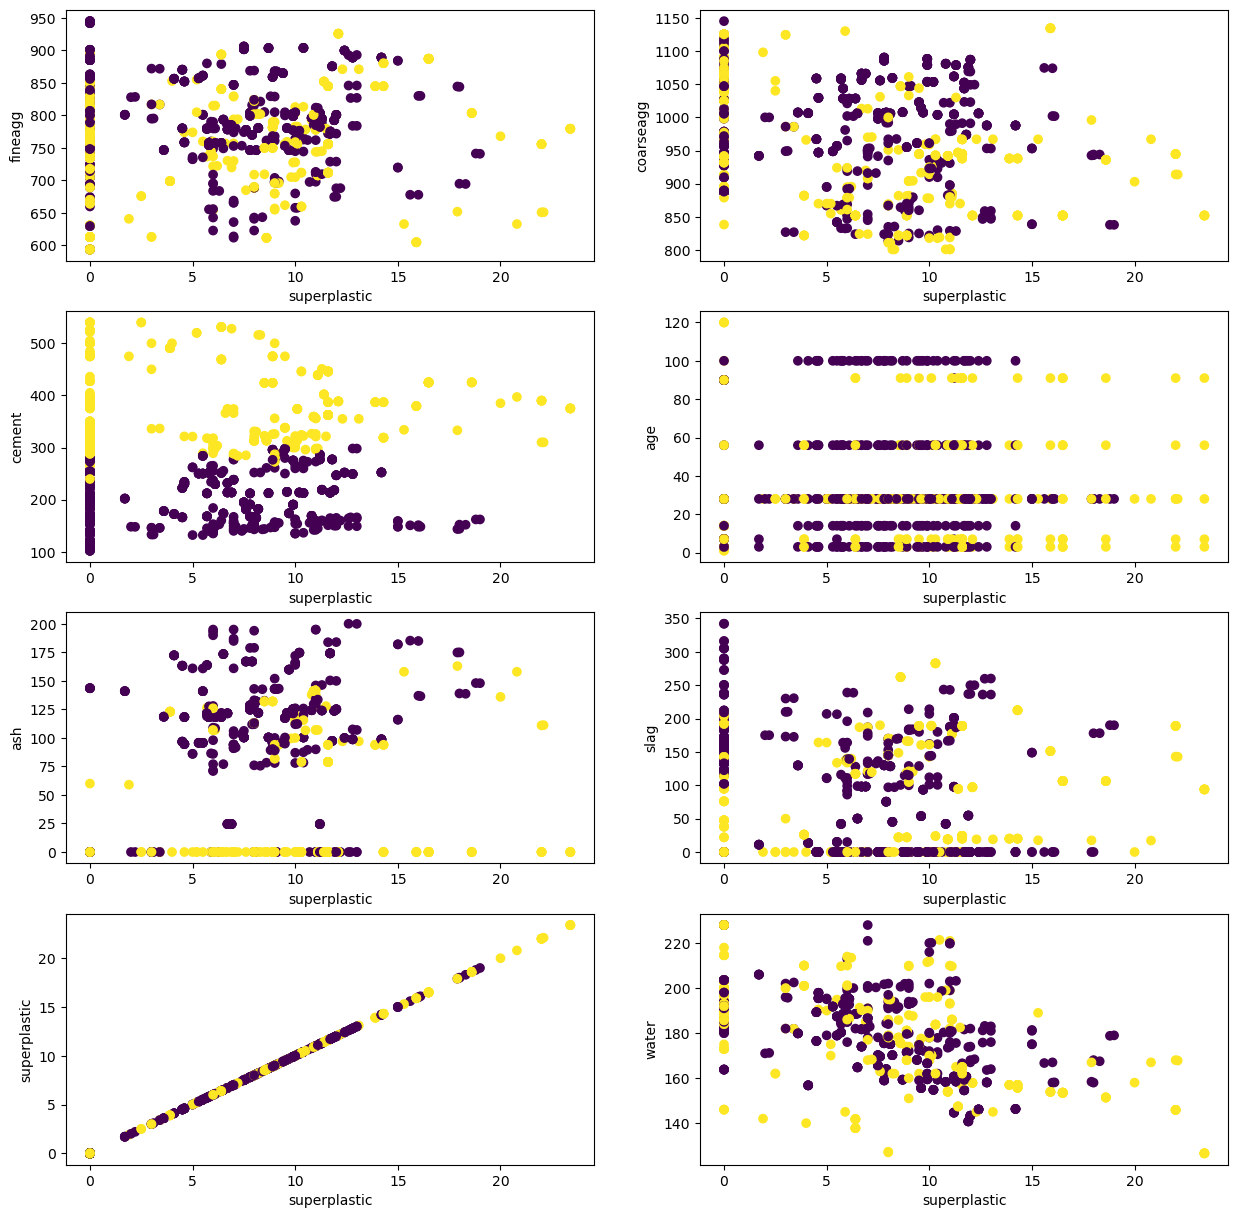

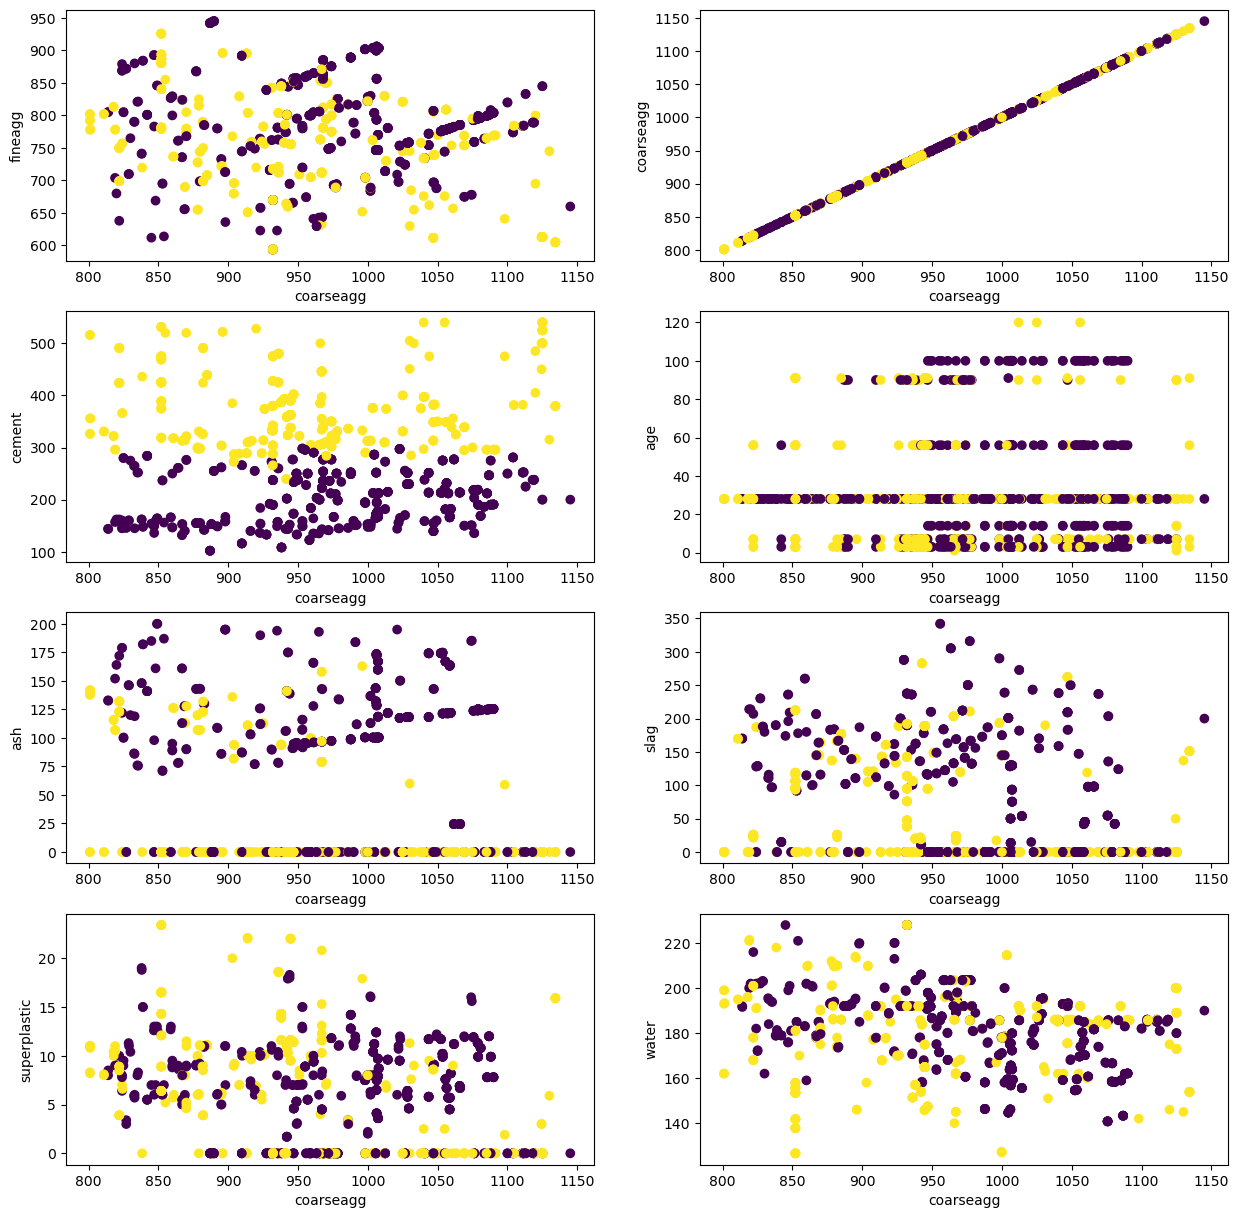

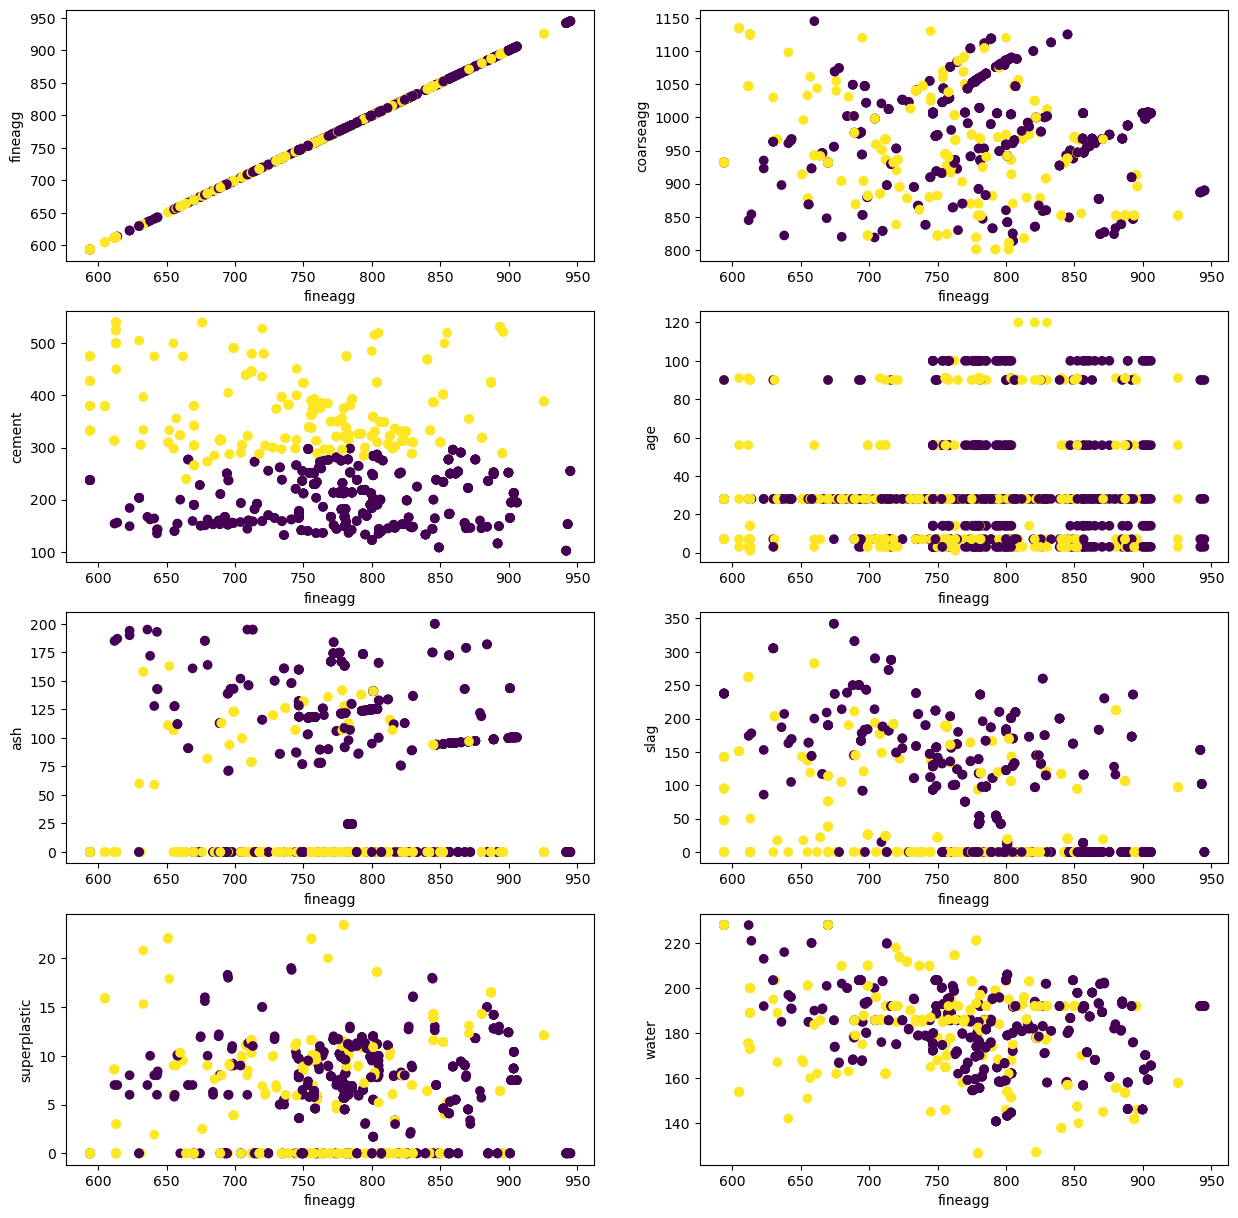

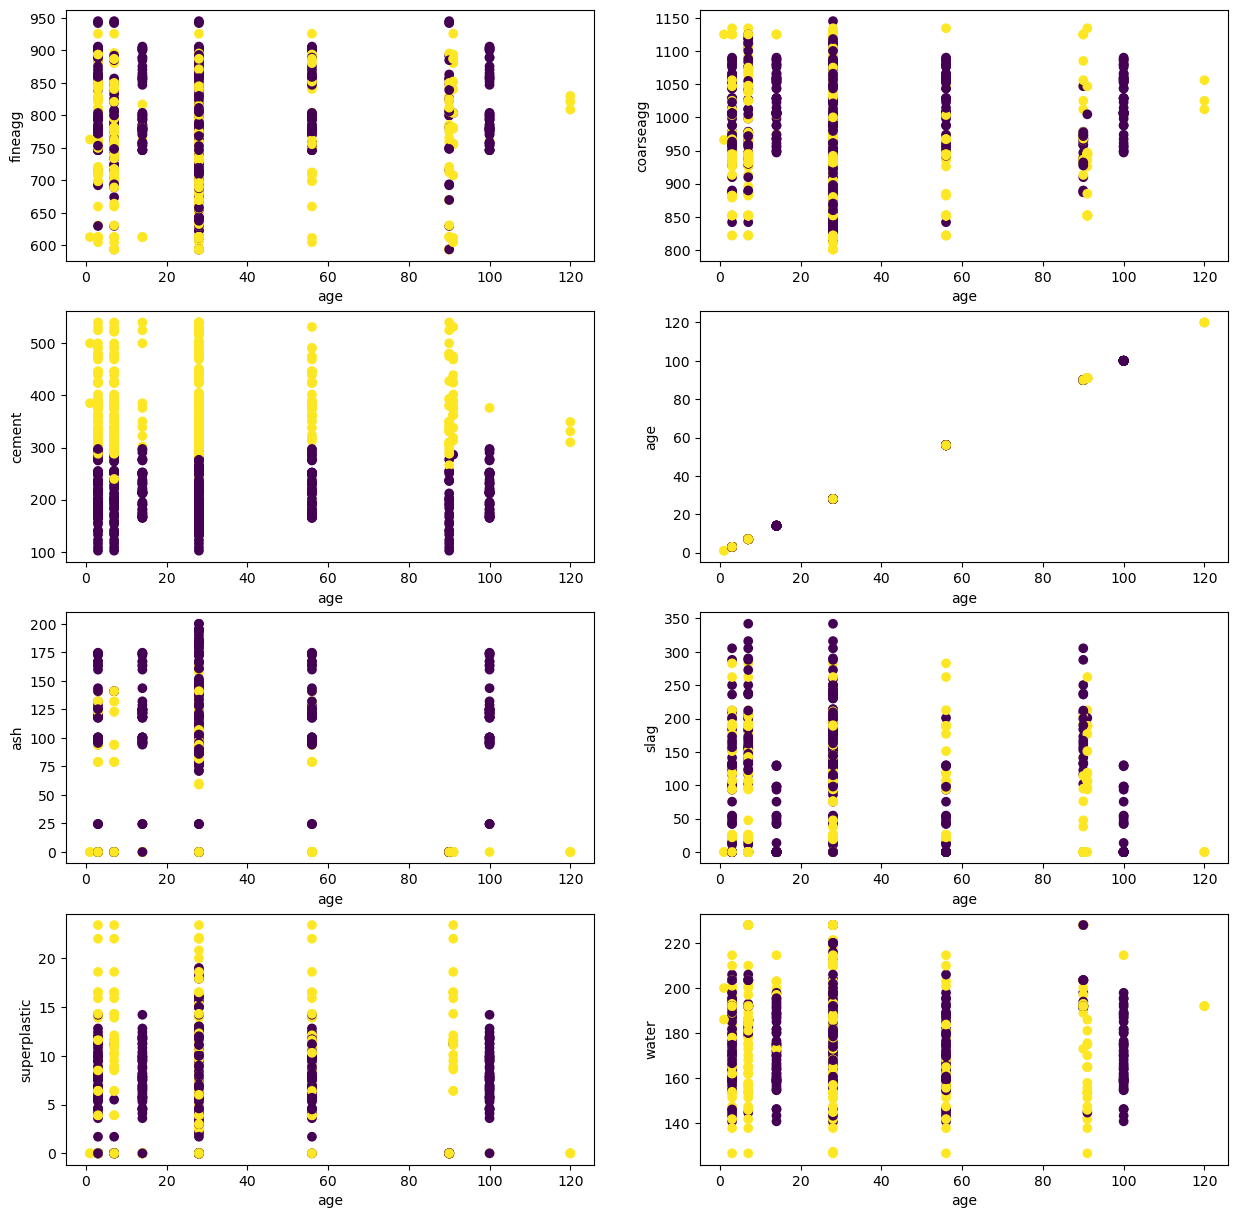

In [31]:
x = df.drop('strength', axis=1)
for col in x.columns:
    clustering(x, col, cluster)

In [32]:
new_df = df.join(pd.DataFrame(cluster,columns=['cluster']), how='left')
new_df.head(20)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0    141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1    168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2    250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3    266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4    154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5    255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6    166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7    251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8    296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9    155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   
10   151.8  178.1  138.7  167.5          18.3      944.0    694.6   28   
11   173.0  116.0    0.0  192.0           0.0      946.8    856.8    3   
12   385.0    0.0    0.0  186.0           0.0      966.0    763.0   14   
13   237.5  237.5    0.0  228.0           0.0      932.0    594.0    7   
14   167.0  187.0  195.0  185.0           7.0      898.0    636.0   28   
15   213.8   98.1   24.5  181.7           6.7     1066.0    785.5  100   
16   237.5  237.5    0.0  228.0           0.0      932.0    594.0   28   
17   336.0    0.0    0.0  182.0           3.0      986.0    817.0   28   
18   190.7    0.0  125.4  162.1           7.8     1090.0    804.0    3   
19   312.7    0.0    0.0  178.1           8.0      999.7    822.2   28   

    strength  cluster  
0      29.89        0  
1      23.51        0  
2      29.22        0  
3      45.85        1  
4      18.29        0  
5      21.86        0  
6      15.75        0  
7      36.64        0  
8      21.65        1  
9      28.99        0  
10     36.35        0  
11      6.94        0  
12     27.92        1  
13     26.26        0  
14     23.89        0  
15     49.97        0  
16     30.08        0  
17     44.86        1  
18     15.04        0  
19     25.10        1

In [33]:
info = new_df.groupby('cluster')['cement'].agg(['mean', 'median'])
info

mean  median
cluster                    
0        203.132804   202.0
1        376.731317   362.6

In [34]:
cluster_df = new_df.merge(info,on='cluster', how='left')
cluster_df.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   

   strength  cluster        mean  median  
0     29.89        0  203.132804   202.0  
1     23.51        0  203.132804   202.0  
2     29.22        0  203.132804   202.0  
3     45.85        1  376.731317   362.6  
4     18.29        0  203.132804   202.0  
5     21.86        0  203.132804   202.0  
6     15.75        0  203.132804   202.0  
7     36.64        0  203.132804   202.0  
8     21.65        1  376.731317   362.6  
9     28.99        0  203.132804   202.0

In [35]:
multiple_models(cluster_df,'strength')

Model name       RMSE  R2 Score
6      RF Regression   5.936520  0.856532
9     XGB Regression   6.245079  0.841230
8      GB Regression   6.806734  0.811388
3      DT Regression   7.685772  0.759526
7     ADB Regression   7.814085  0.751430
1              Lasso   9.176730  0.657178
0  Linear Regression   9.179300  0.656986
2              Ridge   9.200571  0.655395
4      KN Regression  10.057641  0.588201
5      SV Regression  13.717960  0.233924

In [36]:
k_fold_cv(cluster_df.drop('strength', axis=1),cluster_df['strength'])

Model Name  Avg.R2 Score  STD R2 Score
8            xgb      0.899436      0.046856
3  Random Forest      0.888229      0.033209
9            gbr      0.875588      0.045064
6             Dt      0.840462      0.049140
7            Ada      0.738560      0.035591
0    Linear Reg.      0.686679      0.062299
2          Ridge      0.686641      0.062314
1          Lasso      0.686437      0.062413
5            knr      0.669227      0.087720
4            svr      0.238544      0.045211

In [37]:
cv_hpt(cluster_df.drop('strength', axis=1), cluster_df['strength'])

Model Name  Avg.R2 Score  STD R2 Score
8            xgb      0.901786      0.043815
3  Random Forest      0.888735      0.034950
9            gbr      0.875896      0.044978
6             Dt      0.825052      0.044961
7            Ada      0.749854      0.032826
0    Linear Reg.      0.686679      0.062299
2          Ridge      0.686641      0.062314
1          Lasso      0.686437      0.062413
5            knr      0.669227      0.087720
4            svr      0.238544      0.045211

### Feature Importance

In [38]:
X_train, X_test, Y_train, Y_test = trainAndtestsplit(cluster_df, 'strength') 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

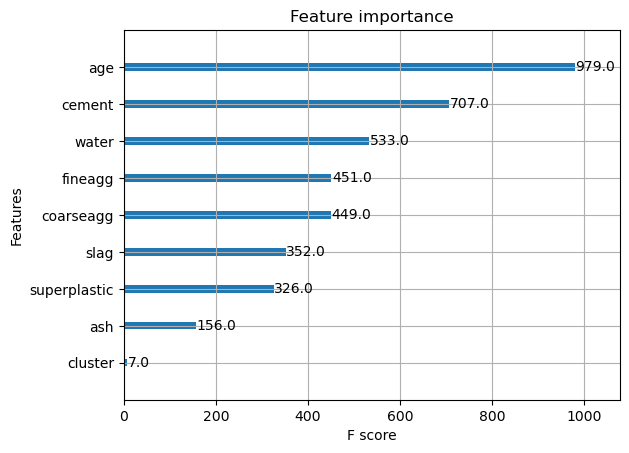

In [39]:
xgb = XGBRegressor(alpha=1, gamma=0, reg_lambda=1)
xgb.fit(X_train, Y_train)
xgboost.plot_importance(xgb)

In [40]:
important_df = cluster_df[['age', 'cement', 'water', 'fineagg', 'strength']]
important_df.head(10)

age  cement  water  fineagg  strength
0   28   141.3  203.5    748.5     29.89
1   14   168.9  158.3    796.2     23.51
2   28   250.0  187.4    861.2     29.22
3   28   266.0  228.0    670.0     45.85
4   28   154.8  193.3    696.7     18.29
5   90   255.0  192.0    945.0     21.86
6    7   166.8  203.5    692.6     15.75
7   56   251.4  188.5    757.7     36.64
8   28   296.0  192.0    765.0     21.65
9   28   155.0  194.0    699.0     28.99

In [41]:
cv_hpt(important_df.drop('strength', axis=1), important_df['strength'])

Model Name  Avg.R2 Score  STD R2 Score
8            xgb      0.880461      0.049109
3  Random Forest      0.855306      0.038167
9            gbr      0.830944      0.033205
6             Dt      0.791980      0.054472
7            Ada      0.686965      0.033844
5            knr      0.675337      0.068406
1          Lasso      0.595301      0.042234
2          Ridge      0.595275      0.042480
0    Linear Reg.      0.595275      0.042480
4            svr      0.309546      0.050420

### Learning Curve

In [42]:
def glc(model_name, estimator, X, Y):
    train_size, train_score, test_score = learning_curve(estimator=estimator, X=X, y=Y, cv=10)
    train_score_mean = np.mean(train_score, axis=1)
    test_score_mean = np.mean(test_score, axis=1)
    plt.plot(train_size, train_score_mean, c='blue')
    plt.plot(train_size, test_score_mean, c='red')
    plt.xlabel('Samples')
    plt.ylabel('R2 Score')
    plt.title('Learning Curve for'+ model_name)
    plt.legend(('Training Score', 'Testing Score'))

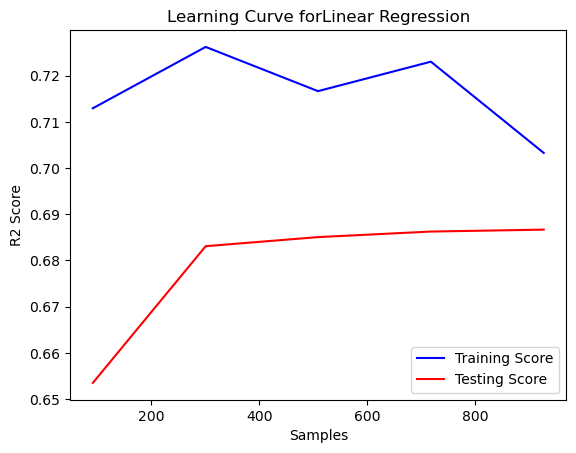

In [43]:
glc('Linear Regression', LinearRegression(), cluster_df.drop('strength', axis=1), cluster_df['strength'])

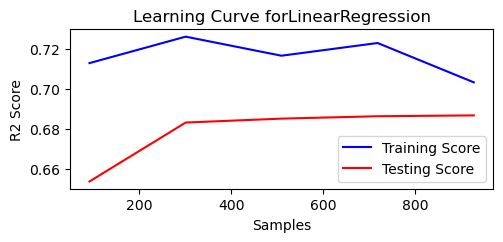

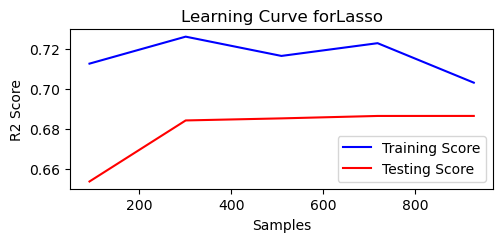

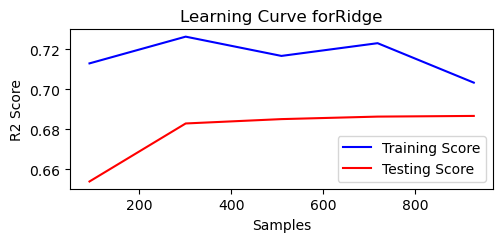

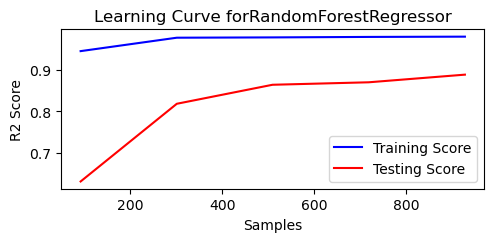

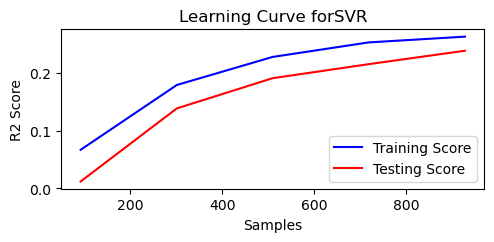

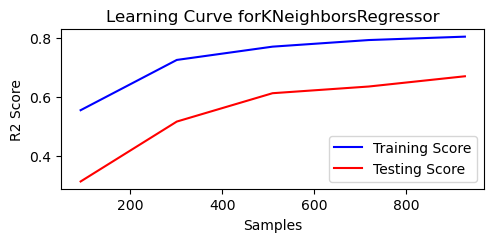

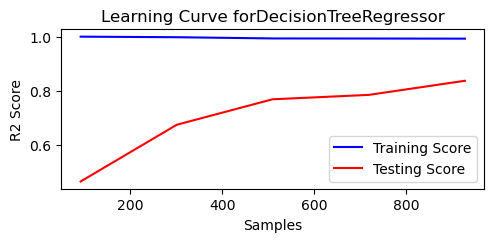

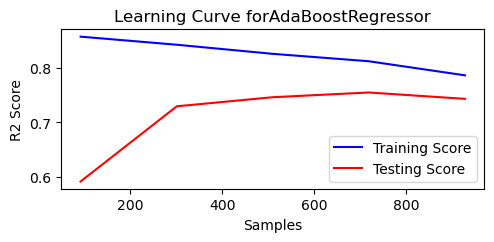

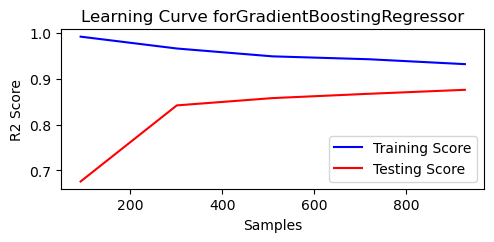

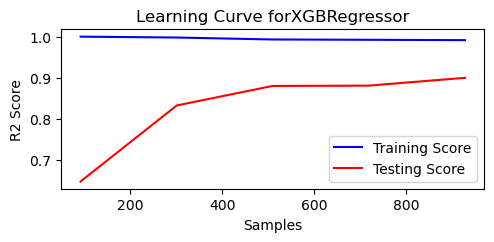

In [44]:
models = [LinearRegression(), Lasso(), Ridge(), RandomForestRegressor(), SVR(), 
          KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(), 
          GradientBoostingRegressor(), XGBRegressor()]
for a,model in enumerate(models):
    fg = plt.figure(figsize = (12,12))
    ax = fg.add_subplot(5,2,a+1)
    glc(type(models[a]).__name__,model,cluster_df.drop('strength', axis=1), cluster_df['strength'])